In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 41.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=c14dd1995712c07da6a02b09ecb3e41b24ad99289ba015f030e07029204905ac
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ydata_profiling

### 워드 클라우드 -> 시각화
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import os
import tarfile
tar_file = '/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/yelp_dataset.tar'

# 파일 해제
if tarfile.is_tarfile(tar_file):
    with tarfile.open(tar_file) as tar:
        tar.extractall()
        print(f"{tar_file} 파일이 성공적으로 해제되었습니다.")
else:
    print(f"{tar_file} 파일은 tar 형식이 아닙니다.")

/content/drive/MyDrive/ASAC 데이터 분석 과정/기업연계_프로젝트/yelp_dataset.tar 파일이 성공적으로 해제되었습니다.


In [ ]:
## 리뷰 699만개

import pandas as pd

# Load the JSON file into a DataFrame with a specified encoding
reviews = pd.read_json('/content/yelp_academic_dataset_review.json',\
                        lines=True, orient='columns', chunksize=700000)

business = pd.read_json('/content/yelp_academic_dataset_business.json',\
                        lines=True, orient='columns',chunksize=1500000)

checkins = pd.read_json('/content/yelp_academic_dataset_checkin.json',\
                        lines=True, orient='columns',encoding="utf-8",chunksize=1500000)

users = pd.read_json('/content/yelp_academic_dataset_user.json',\
                        lines=True, orient='columns',chunksize=1500000)

tips = pd.read_json('/content/yelp_academic_dataset_tip.json',\
                        lines=True, orient='columns',chunksize=1500000)

1. Business.json - 레스토랑의 위치, 카테고리 및 등급 등 레스토랑 데이터
2. Review.json - 실제 리뷰 데이터
3. User.json - 리뷰를 남긴 유저의 데이터
4. Checkin.json - 업무 시간 및 해당 시간에 들어오는 인원 수 데이터
5. Tip.json - 짧은 리뷰 데이터

In [ ]:
for business in business:
  subset_business = business
  break

for review in reviews:
  subset_review = review
  break

for checkin in checkins:
  subset_checkin = checkin
  break

for user in users:
  subset_user = user
  break

for tip in tips:
  subset_tip = tip
  break

In [ ]:
len(subset_business)

150346

In [ ]:
profile = subset_review.profile_report()
profile

# 70만개의 리뷰 자체에서 한번 보았더니, 우선 대다수의 리뷰에는 useful, funny, cool등이 달려있지 않은 것을 확인 할 수 있음
# useful has 385828 (55.1%)
# funny has 589822 (84.3%)
#cool has 537866 (76.8%)

# 이 부분을 가지고 해볼 수 있는 것들을 시도해본다면?

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
subset_review[subset_review['useful'] > 3].count()

### 개별 리뷰가 50개 이상 받은건 222개
# 10개 이상 받은건 8265 1% 정도...



review_id            58037
user_id              58037
business_id          58037
stars                58037
useful               58037
funny                58037
cool                 58037
text                 58037
date                 58037
Useful               58037
Scaled_Log_Useful    58037
dtype: int64

In [ ]:
subset_review[subset_review['cool'] > 10].count()
## cool은 더 희귀하다 3192

review_id            3192
user_id              3192
business_id          3192
stars                3192
useful               3192
funny                3192
cool                 3192
text                 3192
date                 3192
Useful               3192
Scaled_Log_Useful    3192
dtype: int64

In [ ]:
subset_review[subset_review['funny'] > 10].count()
## 1782

review_id            1782
user_id              1782
business_id          1782
stars                1782
useful               1782
funny                1782
cool                 1782
text                 1782
date                 1782
Useful               1782
Scaled_Log_Useful    1782
dtype: int64

### Useful의 그래프 형태 그려보기

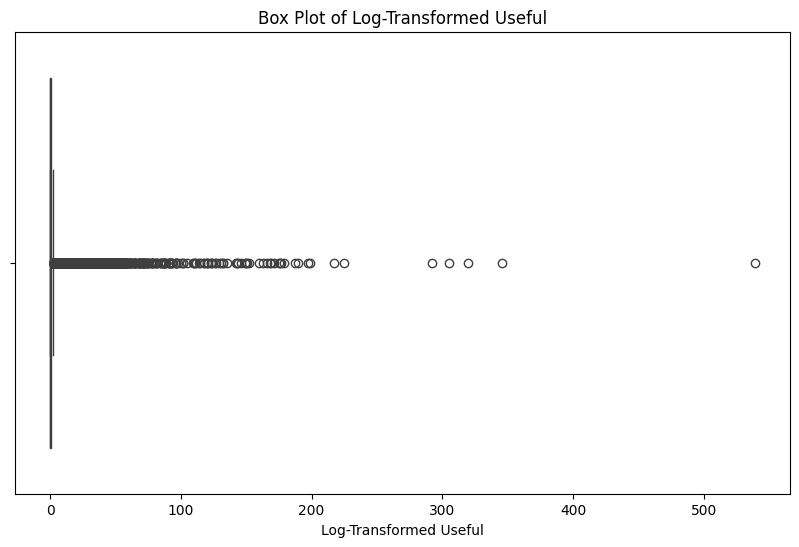

In [ ]:
### 이상치 그려보기
### 이렇게 그려보면 이상치의 시작을 아긴 어려움

df = subset_review
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['useful'])
plt.title('Box Plot of Log-Transformed Useful')
plt.xlabel('Log-Transformed Useful')
plt.show()

In [ ]:
Q1 = df['useful'].quantile(0.25)
Q3 = df['useful'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['useful'] > upper_bound]
outliers_start_point = outliers['useful'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

## useful이 3이상이면 일반적인 리뷰가 아니라는 것을 의미한다.

이상치가 시작되는 시점: 3


#### funny의 이상치

In [ ]:
Q1 = df['funny'].quantile(0.25)
Q3 = df['funny'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['funny'] > upper_bound]
outliers_start_point = outliers['funny'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

## funny는 1이상,

이상치가 시작되는 시점: 1


#### cool의 이상치

In [ ]:
Q1 = df['cool'].quantile(0.25)
Q3 = df['cool'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = df[df['cool'] > upper_bound]
outliers_start_point = outliers['cool'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

## cool도 이상치는 1 이상

이상치가 시작되는 시점: 1


- Useful은 3이상, Cool, Funny는 1 이상이면 상위 25%의 리뷰라고 볼 수 있다.

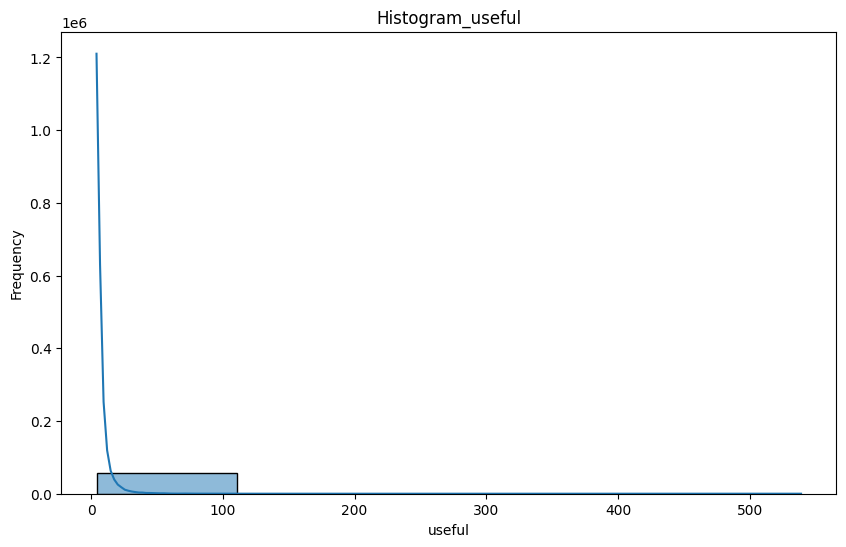

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 예제 데이터프레임 생성 (실제 데이터로 교체)
df = subset_review[subset_review['useful'] > 3]  # 실제 데이터 파일 경로로 교체
#df['Useful'] = np.log1p(df['useful'])  # 0이 포함된 데이터를 로그 변환하기 위해 log1p 사용

# 최소-최대 스케일러를 사용하여 0과 1 사이로 변환
#scaler = MinMaxScaler()
#df['Scaled_Log_Useful'] = scaler.fit_transform(df[['Useful']])

plt.figure(figsize=(10, 6))
sns.histplot(df['useful'], bins=5, kde=True)
plt.title('Histogram_useful')
plt.xlabel('useful')
plt.ylabel('Frequency')
plt.show()



# 변환된 데이터를 사용하여 히스토그램 그리기
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Scaled_Log_Useful'], bins=5, kde=True)
# plt.title('Histogram of Log-Transformed Variable')
# plt.xlabel('Log-Transformed Useful')
# plt.ylabel('Frequency')
# plt.show()


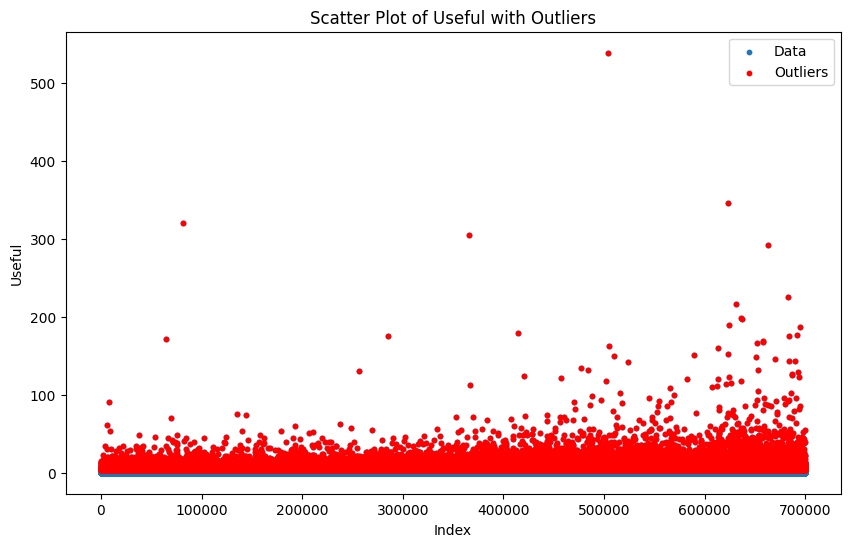

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['useful'], s=10, label='Data')
plt.scatter(outliers.index, outliers['useful'], s=10, color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Useful')
plt.title('Scatter Plot of Useful with Outliers')
plt.legend()
plt.show()


# 리뷰 공감 키워드 분석
* 리뷰를 보는 유저들이 리뷰를 보면서 남기는 useful, cool, funny는 어떤 영향을 미치는지 알아보자.

### 평점과 useful, cool, funny와의 선형 관계가 있을까?

In [ ]:
# 평점 대비해서 useful이랑 관계가 선형적인 관계가 있는지 확인
subset_review.head(1)

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   

   stars  useful  funny  cool  \
0      3       0      0     0   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11

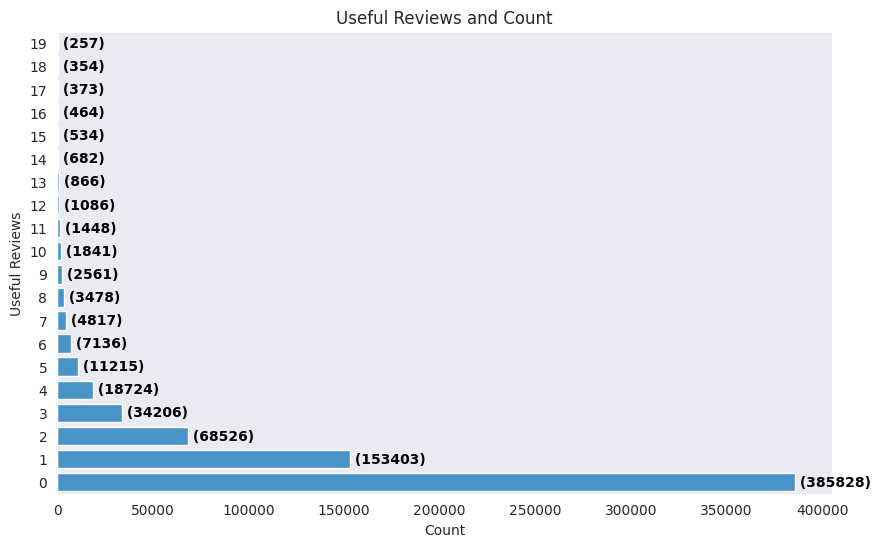

In [ ]:
reviews_filtered = subset_review
# 그룹화 및 요약
summary = reviews_filtered.groupby('useful').size().reset_index(name='Count')

# Count 기준으로 정렬
summary_sorted = summary.sort_values(by='Count', ascending=False).head(20)

# 'useful' 재정렬
summary_sorted['useful'] = summary_sorted['useful'].astype(str)
summary_sorted = summary_sorted.sort_values('Count', ascending=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
fillColor = "#3498db"  # 색상 설정

sns.barplot(x='Count', y='useful', data=summary_sorted, palette=[fillColor])
for index, value in enumerate(summary_sorted['Count']):
    plt.text(value, index, f' ({value})', va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Useful Reviews')
plt.title('Useful Reviews and Count')
plt.show()

# 리뷰 중에서 요약해서 봐야 하는 리뷰는 이런 공감 키워드가 많은 리뷰들이 아닐까?

### 리뷰의 수치형 feature로 상관관계를 분석

### 새로운 feature


useful, funny, cool을 모두 더해서 신뢰도 라는 지표로 삼기 위해 만들어보았다.

In [ ]:
subset_review['trust'] = subset_review['useful'] + subset_review['funny'] + subset_review['cool']

In [ ]:
#correlation_matrix = subset_review.corr()
# 상관관계는 수치로만 볼 수 있기에 먼저 str은 제거한다.
cor_review = subset_review.drop(['review_id','user_id', 'business_id','text', 'date'], axis = 1)

#stars
cor_review.corr()

# trust 는 useful + funny + cool이므로 상관 관계가 높게 나온다.
# 단, 평점과 유사한 상관 관계는 크게 없다...

stars    useful     funny      cool     trust
stars   1.000000 -0.079770 -0.045974  0.073389 -0.029067
useful -0.079770  1.000000  0.588611  0.705759  0.917460
funny  -0.045974  0.588611  1.000000  0.721186  0.816813
cool    0.073389  0.705759  0.721186  1.000000  0.898363
trust  -0.029067  0.917460  0.816813  0.898363  1.000000

In [ ]:
subset_business.head(1)

business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 Chapala St, Ste 2   

            city state postal_code   latitude   longitude  stars  \
0  Santa Barbara    CA       93101  34.426679 -119.711197    5.0   

   review_count  is_open                     attributes  \
0             7        0  {'ByAppointmentOnly': 'True'}   

                                          categories hours  
0  Doctors, Traditional Chinese Medicine, Naturop...  None

In [ ]:

bus_review = subset_business.merge(subset_review, on='business_id', how='inner')
bus_review.head(1)

In [ ]:
bus_review.info()

## attributes, categories, hours에 빈값이 존재함.
# 또한, 이 3가지는 모두 object 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   business_id        700000 non-null  object        
 1   name               700000 non-null  object        
 2   address            700000 non-null  object        
 3   city               700000 non-null  object        
 4   state              700000 non-null  object        
 5   postal_code        700000 non-null  object        
 6   latitude           700000 non-null  float64       
 7   longitude          700000 non-null  float64       
 8   stars_x            700000 non-null  float64       
 9   review_count       700000 non-null  int64         
 10  is_open            700000 non-null  int64         
 11  attributes         682278 non-null  object        
 12  categories         699941 non-null  object        
 13  hours              660915 non-null  object  

In [ ]:
useful_sum = bus_review.groupby(['name','business_id','stars_x','stars_y'], as_index=False)['useful'].sum()
top_10_useful= useful_sum.sort_values(by='useful', ascending=False).head(500)



In [ ]:
bus_review.head(1)

business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 Chapala St, Ste 2   

            city state postal_code   latitude   longitude  stars_x  \
0  Santa Barbara    CA       93101  34.426679 -119.711197      5.0   

   review_count  ...               review_id                 user_id stars_y  \
0             7  ...  9vwYDBVI3ymdqcyJ5WW2Tg  e0imecnX_9MtLnS2rUZM-A       5   

  useful funny cool                                               text  \
0      3     2    1  I've had acupuncture treatments with Abby over...   

                 date    Useful  Scaled_Log_Useful  
0 2012-05-02 18:07:38  1.386294           0.220342  

[1 rows x 24 columns]

In [ ]:
top_10_useful

name             business_id  \
28918                        Mazzaro's Italian Market  2KIDQyTh-HzLxOUEDqtDBg   
54799                                         hatWRKS  CkxfUzD10QVOsdWQDucJ6w   
27475                                            Luke  GBTPC53ZrG1ZBY3DT8Mbcw   
24889                            Kia of Wesley Chapel  29gUltfgj3LBIb7268hi9g   
50064                                     Tower Place  LbhHgTK94bFKIq4owlS9NA   
...                                               ...                     ...   
3808                                      Babies R Us  oGasubjIH66zvfp1_4LZcQ   
3807                                      Babies R Us  oGasubjIH66zvfp1_4LZcQ   
3806                                      Babies R Us  oGasubjIH66zvfp1_4LZcQ   
25537                             LL Flooring - Tampa  H-LTyvq7pcGOFdLXuxIDDw   
36150  Planned Parenthood - New Orleans Health Center  gbAySqiNQGLEr4uuuRuaVw   

       stars_x  stars_y  useful  
28918      4.5        5    4118  
54799      3.0        1    3175  
27475      4.0        5    1498  
24889      2.0        1    1439  
50064      3.5        1    1303  
...        ...      ...     ...  
3808       2.0        3       0  
3807       2.0        2       0  
3806       2.0        1       0  
25537      3.5        2       0  
36150      4.0        1       0  

[54908 rows x 5 columns]

In [ ]:
df = bus_review

In [ ]:
print(df[['stars_x', 'useful']].describe())

             stars_x         useful
count  700000.000000  700000.000000
mean        3.768476       1.181343
std         0.744514       3.098806
min         1.000000       0.000000
25%         3.500000       0.000000
50%         4.000000       0.000000
75%         4.500000       1.000000
max         5.000000     539.000000


In [ ]:
correlation = df[['stars_x', 'useful']].corr()
print(f"상관계수: \n{correlation}")

#일반 리뷰별로 가게의 평점과 연관을 지으면 약한 관계가 나타나므로 적절치 못하다.

상관계수: 
          stars_x    useful
stars_x  1.000000 -0.042297
useful  -0.042297  1.000000


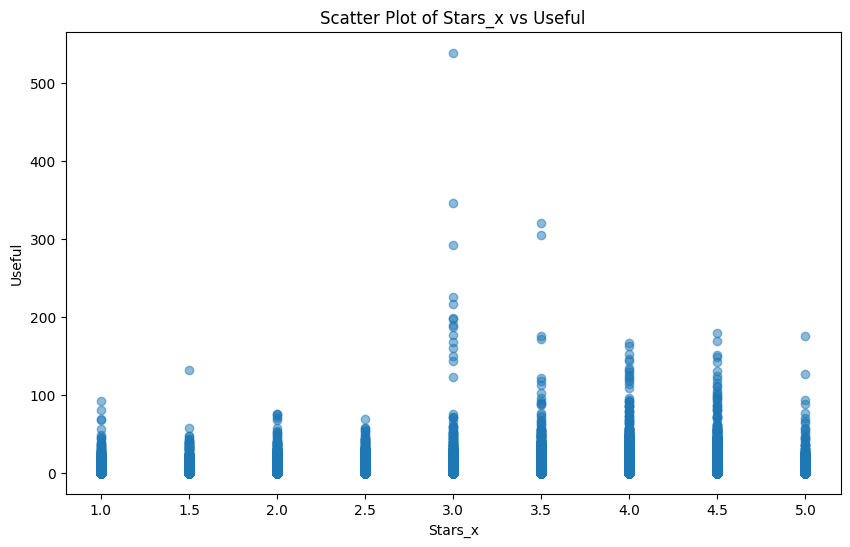

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['stars_x'], df['useful'], alpha=0.5)
plt.xlabel('Stars_x')
plt.ylabel('Useful')
plt.title('Scatter Plot of Stars_x vs Useful')
plt.show()

In [ ]:
k_df = pd.DataFrame()

In [ ]:
k_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['useful'].sum()

In [ ]:
top_100_useful= k_df.sort_values(by='useful', ascending=False).head(100)

In [ ]:
k_df

name             business_id  \
0      "No Macarena" DJ & Custom Music Service  BWo8s2skxQGZUgVooK2HZQ   
1                               $1.99 Cleaners  87Zi_Fq664GnXp8LMydB1g   
2                                  '81 Barbers  t3qEUu4EaCKN3WQU7Pq3oA   
3                                       'feine  VZFQS0SXzXPuxISbAgIVBA   
4                                    +1 Gaming  Rc91dPHle9NgukHkPYL-HQ   
...                                        ...                     ...   
15030                         vybe urgent care  EtR7fUoAPNcUH-j8aXCGqg   
15031                         vybe urgent care  IoBETK0vHznKX008QYQ07g   
15032                                 west elm  -M21d-vRVRaTyVywy8x-Ag   
15033                                 west elm  nXBbzLVtizXS0m_MNhL7HQ   
15034                       willow + june hair  SvcWlFeXbSNkENnZfWYgEQ   

       stars_x  review_count  useful  
0          5.0            23      83  
1          3.5            13      15  
2          4.5            13      11  
3          4.5           166     177  
4          4.0            18      24  
...        ...           ...     ...  
15030      3.0            12       5  
15031      3.5            33      60  
15032      3.5            20      59  
15033      1.5            10       8  
15034      5.0            24      23  

[15035 rows x 5 columns]

In [ ]:
top_100_useful

name             business_id  \
8003                      Mazzaro's Italian Market  2KIDQyTh-HzLxOUEDqtDBg   
9610                               Peppermill Reno  PY9GRfzr4nTZeINf346QOw   
15005                                      hatWRKS  CkxfUzD10QVOsdWQDucJ6w   
7595                                          Luke  GBTPC53ZrG1ZBY3DT8Mbcw   
5129   Gaylord Opryland Resort & Convention Center  ORL4JE6tz3rJxVqkdKfegA   
...                                            ...                     ...   
4553                           Farmhaus Restaurant  vD2jzpPv4iyOLKzITscGvA   
2069                                     Burger Up  NT5S6JV5wPwKOd3s3Yh1zQ   
12881                                   The Buffet  A2q7d-CBM2-81tVkmS4JMw   
10948              SALERNO'S Ristorante & Pizzeria  vcyyzUqEiCTSrFmHgqvxpg   
10377                                 Raijin Ramen  3StNEgKAwpCFR1q0urmJrw   

       stars_x  useful  
8003       4.5    4874  
9610       4.0    3732  
15005      3.0    3552  
7595       4.0    3061  
5129       3.0    2126  
...        ...     ...  
4553       4.0     688  
2069       4.0     688  
12881      3.5     687  
10948      4.0     681  
10377      4.0     680  

[100 rows x 4 columns]

In [ ]:
print(k_df[['stars_x', 'useful']].describe())

            stars_x        useful
count  15035.000000  15035.000000
mean       3.600632     55.000998
std        0.976076    128.433734
min        1.000000      0.000000
25%        3.000000      7.000000
50%        4.000000     19.000000
75%        4.500000     52.000000
max        5.000000   4874.000000


In [ ]:
correlation = k_df[['stars_x', 'useful']].corr()
print(f"상관계수: \n{correlation}")

# useful을 더해서 계산해도 관계가 낮다..

상관계수: 
          stars_x    useful
stars_x  1.000000  0.037401
useful   0.037401  1.000000


In [ ]:
correlation = top_100_useful[['stars_x', 'useful']].corr()
print(f"top100 상관계수: \n{correlation}")

# 100위

top500 상관계수: 
         stars_x   useful
stars_x  1.00000 -0.02066
useful  -0.02066  1.00000


In [ ]:
# 혹시 리뷰 개수가 많을 때 영향을 받을 수 있으므로 개수로 나눠서 확인해보기

k_df['useful_div'] = k_df['useful'] / k_df['review_count']

In [ ]:
correlation = k_df[['stars_x', 'useful_div']].corr()
print(f"상관계수: \n{correlation}")

# useful을 리뷰 개수별로 나눠줬더니 -0.1 정도까지는 상승하는 것이 확인이 됨.

상관계수: 
            stars_x  useful_div
stars_x     1.00000    -0.09995
useful_div -0.09995     1.00000


In [ ]:
top_100_useful['useful_div'] = top_100_useful['useful'] / top_100_useful['review_count']

In [ ]:
correlation = k_df[['stars_x', 'useful_div']].corr()
print(f"상관계수: \n{correlation}")

# useful을 리뷰 개수별로 나눠줬더니 -0.1 정도까지는 상승하는 것이 확인이 됨.

In [ ]:
correlation = top_100_useful[['stars_x', 'useful_div']].corr()
print(f"상관계수: \n{correlation}")

# 상위 100위 안에서 useful_div로 나눠준 값을 확인해봤더니 -0.2까지 올라옴

상관계수: 
             stars_x  useful_div
stars_x     1.000000   -0.197199
useful_div -0.197199    1.000000


In [ ]:
## 혹시 상위 50위권으로 가면?
top_50_useful= k_df.sort_values(by='useful', ascending=False).head(50)
top_50_useful['useful_div'] = top_50_useful['useful'] / top_50_useful['review_count']

correlation = top_50_useful[['stars_x', 'useful_div']].corr()
print(f"상관계수: \n{correlation}")

# 상위 100위 : - 0.2
# 상위 50위 안에서 useful_div로 나눠준 값을 확인해봤더니 -0.22까지도 올라온다.

상관계수: 
             stars_x  useful_div
stars_x     1.000000   -0.225041
useful_div -0.225041    1.000000


#### Cool의 지표로 동일하게 체크

In [ ]:
cool_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['cool'].sum()
top_100_cool= cool_df.sort_values(by='cool', ascending=False).head(100)
top_50_cool= cool_df.sort_values(by='cool', ascending=False).head(50)

In [ ]:
correlation = cool_df[['stars_x', 'cool']].corr()
print(f"기본 df 상관계수: \n{correlation}")

기본 df 상관계수: 
          stars_x      cool
stars_x  1.000000  0.122361
cool     0.122361  1.000000


In [ ]:
correlation = top_100_cool[['stars_x', 'cool']].corr()
print(f"Top 100 상관계수: \n{correlation}")

Top 100 상관계수: 
          stars_x      cool
stars_x  1.000000 -0.011362
cool    -0.011362  1.000000


In [ ]:
correlation = top_50_cool[['stars_x', 'cool']].corr()
print(f"Top 50 상관계수: \n{correlation}")

# cool은 높은것과 평점이 전혀 관련이 없다고 보여짐

Top 100 상관계수: 
          stars_x      cool
stars_x  1.000000 -0.047057
cool    -0.047057  1.000000


#### Funny 지표 체크

In [ ]:
funny_df = bus_review.groupby(['name','business_id','stars_x','review_count'],as_index=False)['funny'].sum()
top_100_funny= funny_df.sort_values(by='funny', ascending=False).head(100)
top_50_funny= funny_df.sort_values(by='funny', ascending=False).head(50)

In [ ]:
correlation = funny_df[['stars_x', 'funny']].corr()
print(f"기본 df 상관계수: \n{correlation}")

correlation = top_100_funny[['stars_x', 'funny']].corr()
print(f"Top 100 상관계수: \n{correlation}")

correlation = top_50_funny[['stars_x', 'funny']].corr()
print(f"Top 50 상관계수: \n{correlation}")

# cool은 높은것과 평점이 전혀 관련이 없다고 보여짐


기본 df 상관계수: 
          stars_x     funny
stars_x  1.000000  0.041319
funny    0.041319  1.000000
Top 100 상관계수: 
          stars_x     funny
stars_x  1.000000 -0.030431
funny   -0.030431  1.000000
Top 50 상관계수: 
          stars_x     funny
stars_x  1.000000 -0.058613
funny   -0.058613  1.000000


In [ ]:
#bus_review로 해도?

Q1 = k_df['useful'].quantile(0.25)
Q3 = k_df['useful'].quantile(0.75)

## 일반적인 이상치 구분의 25% 75% 구분 사용으로

# IQR 계산
IQR = Q3 - Q1

# 이상치의 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 시작되는 시점 찾기
outliers = k_df[k_df['useful'] > upper_bound]
outliers_start_point = outliers['useful'].min()

print(f"이상치가 시작되는 시점: {outliers_start_point}")

# business_id로 group by를 하면 120이라는 값부터 상위 25%

이상치가 시작되는 시점: 120


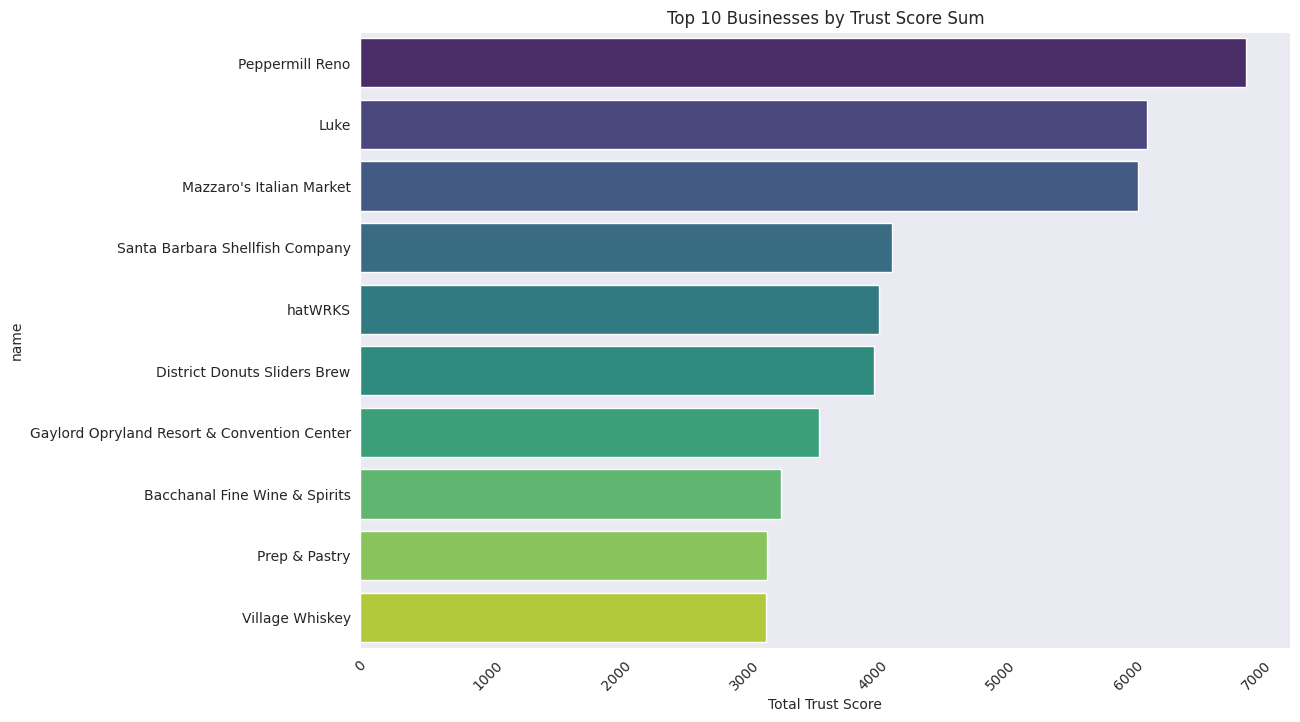

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_trust, x='trust', y='name', palette='viridis',orient='h')

plt.title('Top 10 Businesses by Trust Score Sum')
plt.xlabel('Total Trust Score')
plt.ylabel('name')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_unique = bus_review_k.drop(columns=['trust_x']).drop_duplicates(subset='business_id')

k = df_unique.drop(columns=['latitude','longitude','postal_code','review_id','date','user_id','stars_y',	'useful','funny',	'cool',	'text'], axis=1)
k.sort_values(by='trust_div', ascending=False).head(2)
#trust_div와 star_x 간의 관계


business_id            name_x         address       city  \
146303  PPJL9EbIM6B6r86Gf-H0nw  Ashley Izquierdo                      Tampa   
621675  CkxfUzD10QVOsdWQDucJ6w           hatWRKS  1027 8th Ave S  Nashville   

       state  stars_x  review_count  is_open  \
146303    FL      5.0             5        1   
621675    TN      3.0            46        1   

                                               attributes  \
146303  {'BusinessAcceptsCreditCards': 'True', 'WiFi':...   
621675  {'BusinessParking': '{'garage': False, 'street...   

                                               categories  \
146303  Event Photography, Photographers, Session Phot...   
621675               Hats, Accessories, Fashion, Shopping   

                                                    hours            name_y  \
146303  {'Monday': '7:0-22:30', 'Tuesday': '7:0-22:30'...  Ashley Izquierdo   
621675  {'Monday': '0:0-0:0', 'Tuesday': '10:0-17:45',...           hatWRKS   

        trust_y  trust_div  
146303      474  94.800000  
621675     4052  88.086957

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터
# data = ...  # 여기에 데이터프레임을 불러오거나 정의하세요.

data = subset_review
# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# 플롯 1: Funny vs Star Rating
sns.scatterplot(ax=axs[0], x='funny', y='stars', data=data, alpha=0.5, s=40, palette='viridis')
axs[0].set_title('Funny vs Star Rating', fontsize=18)
axs[0].set_xlabel('Funny', fontsize=14)
axs[0].set_ylabel('Star Rating', fontsize=14)

# 플롯 2: Cool vs Star Rating
sns.scatterplot(ax=axs[1], x='cool', y='stars', data=data, alpha=0.5, s=40, palette='plasma')
axs[1].set_title('Cool vs Star Rating', fontsize=18)
axs[1].set_xlabel('Cool', fontsize=14)
axs[1].set_ylabel('Star Rating', fontsize=14)

# 플롯 3: Useful vs Star Rating
sns.scatterplot(ax=axs[2], x='useful', y='stars', data=data, alpha=0.5, s=40, palette='inferno')
axs[2].set_title('Useful vs Star Rating', fontsize=18)
axs[2].set_xlabel('Useful', fontsize=14)
axs[2].set_ylabel('Star Rating', fontsize=14)

plt.tight_layout()
plt.show()

NameError: name 'subset_review' is not defined

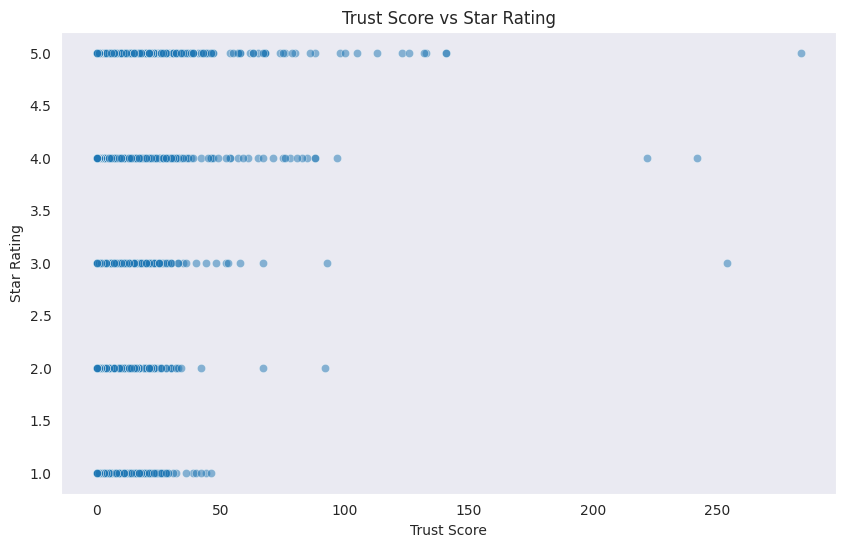

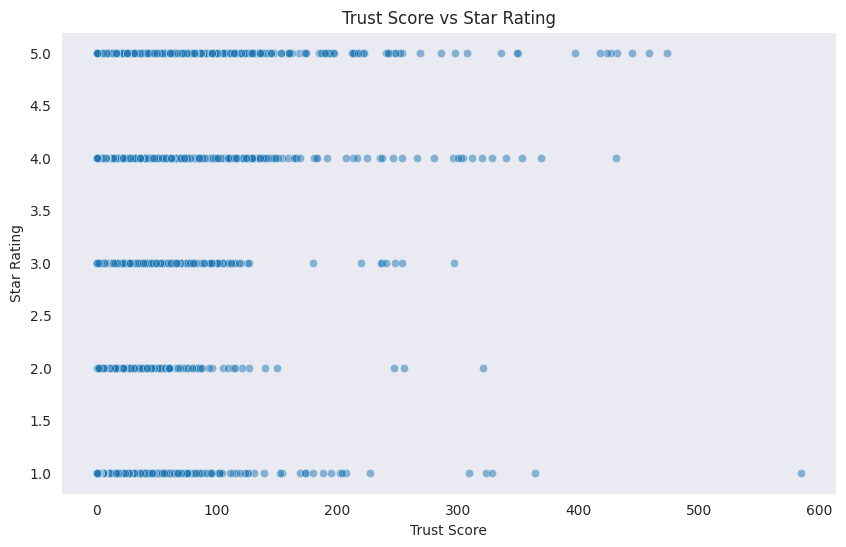

In [ ]:
# 신뢰도 점수와 별점의 상관관계 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trust', y='stars', data=subset_review, alpha=0.5)
plt.title('Trust Score vs Star Rating')
plt.xlabel('Trust Score')
plt.ylabel('Star Rating')
plt.show()

#별점의 분포: 별점은 1점부터 5점까지 고르게 분포되어 있으며, 특히 5점과 4점에 많은 리뷰가 집중
#신뢰도 점수의 분포: 신뢰도 점수는 대체로 낮은 값에서 집중되어 있지만, 일부 리뷰는 매우 높은 신뢰도 점수
#신뢰도 점수와 별점 간의 상관관계:
  #눈으로 봤을 때 신뢰도 점수와 별점 사이에 뚜렷한 상관관계가 보이지 않는다.
  #이는 별점과 신뢰도 점수 간의 관계가 명확하지 않다는 것을 의미

1. trust_div : 가게에 달린 리뷰의 평균 신뢰도 점수
2. star_x : 가게의 별점

둘 사이의 상관관계가 있을까?

In [ ]:
cor_test = df_unique.drop(columns=['is_open','latitude','longitude','postal_code','business_id','name_x','name_y','address','city','state','attributes','categories','hours','review_id','date','user_id','stars_y',	'useful','funny',	'cool',	'text'], axis=1)
cor_test.corr()

# trust_y : 가게의 총합 신뢰도 점수
# star_x : 가게의 평균 평점

# user에는 해당 유저가 받은 cool, useful, funny 데이터가 모여있음.
# 가게의 평점이 높으면 신뢰도 있는 리뷰가 있는 가능성이 6%?
# 신뢰도와 가게의 평점 간에는 큰 상관관계는 없어 보인다.

stars_x  review_count   trust_y  trust_div
stars_x       1.000000      0.069380  0.063944  -0.022327
review_count  0.069380      1.000000  0.861207  -0.028267
trust_y       0.063944      0.861207  1.000000   0.226617
trust_div    -0.022327     -0.028267  0.226617   1.000000

## 가게의 평균 신뢰도 점수가 높다면 그 이유가 무엇일까?



In [ ]:
# 가게의 평균 신뢰도 점수가 높은 순으로 정렬해서 다시 확인했더니
# 특정 가게에서 매우 높은 신뢰도 점수가 나오길래
# 왜 그럴까 찾아보니, 특정 가게에 적힌 특정 리뷰에 강력하게 공감하는 사람들이 많았을 때 점수가 높게 나오는 것으로 확인이 되었음.


## 즉, useful, cool, funny는 특정 댓글들이 실제 유저의 판단에 도움이 되느냐로 봤기에 평점과의 상관 관계가 없었던 것이다.
# 단, 가게에서 남겨진 일반적인 리뷰보다도 훨씬 큰 효과를 불러올 수 있을 것이므로
# 이러한 리뷰가 있다면 가게가 좋은지 나쁜지를 판별할 기준이 될 수 있을 것으로 보인다.

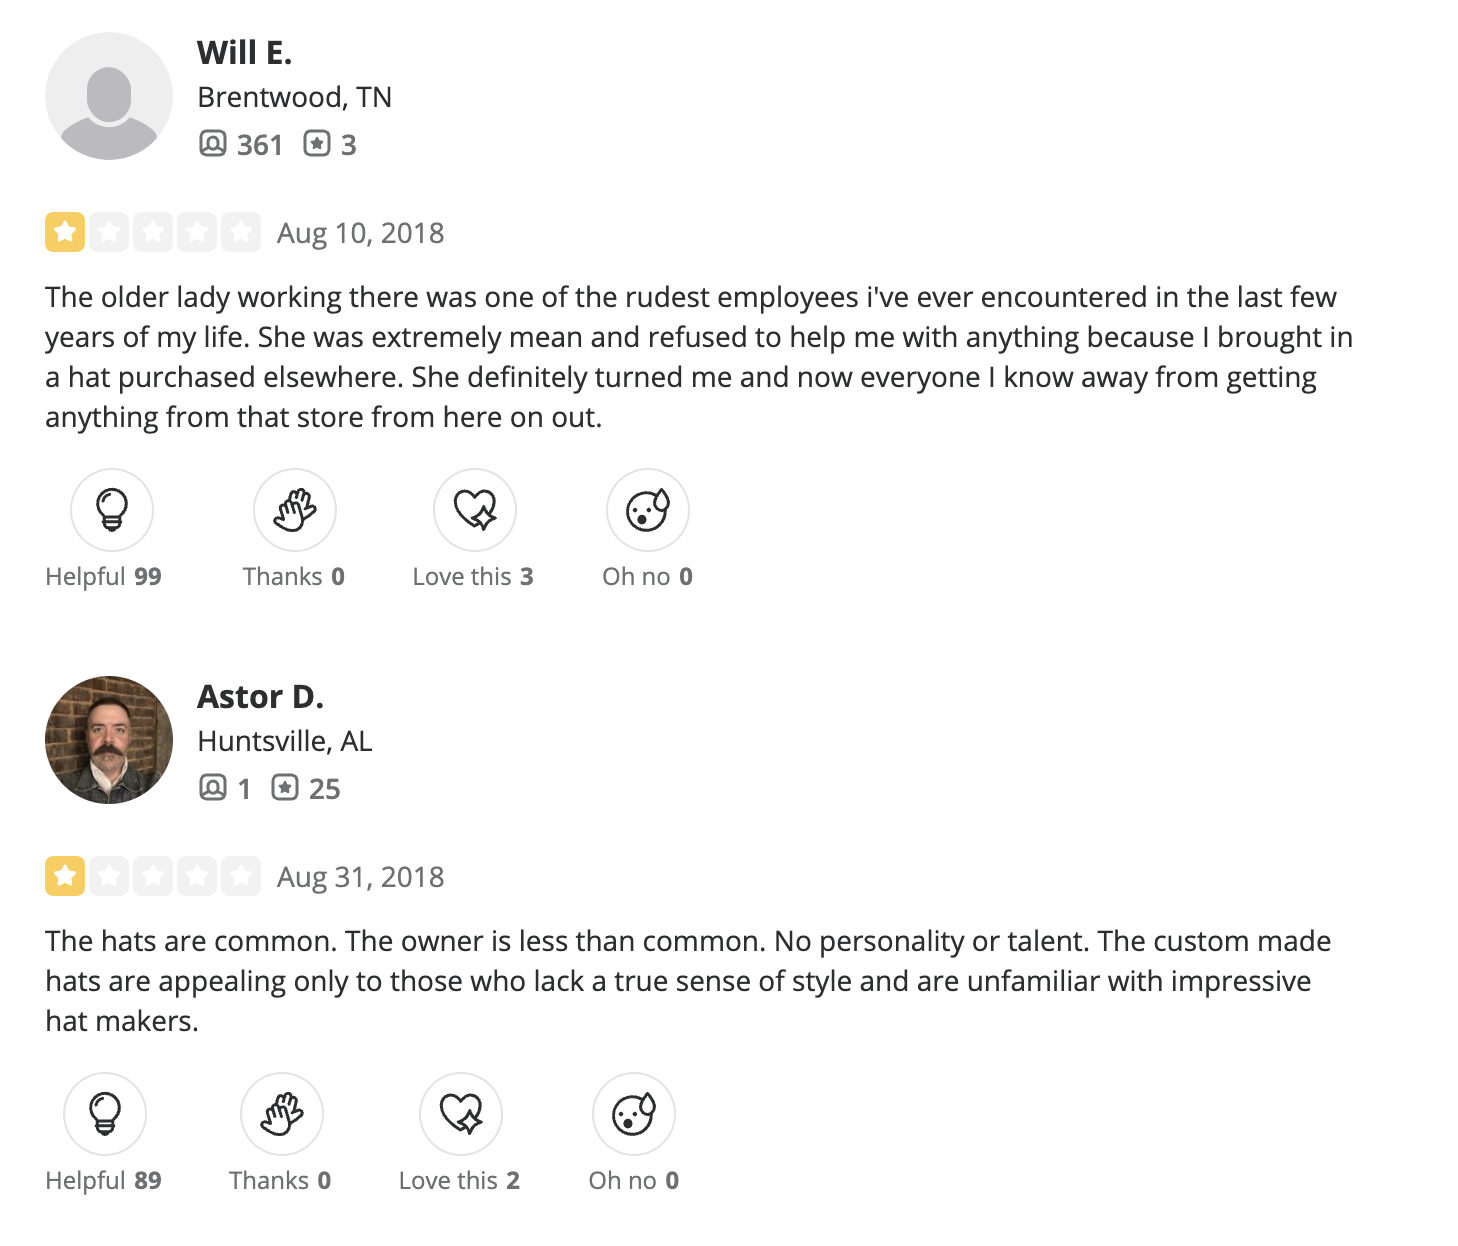

## 신뢰도 점수가 높은 리뷰와 일반 리뷰의 차이 분석
- trust의 상위 25%와 나머지 리뷰는 어떤 키워드가 자주 노출되기에 차이가 있을까?

In [ ]:
# 신뢰도 상위 25%, 75% 구분

threshold = subset_review['trust'].quantile(0.75)
high_trust_reviews = subset_review[subset_review['trust'] >= threshold]
low_trust_reviews = subset_review[subset_review['trust'] < threshold]

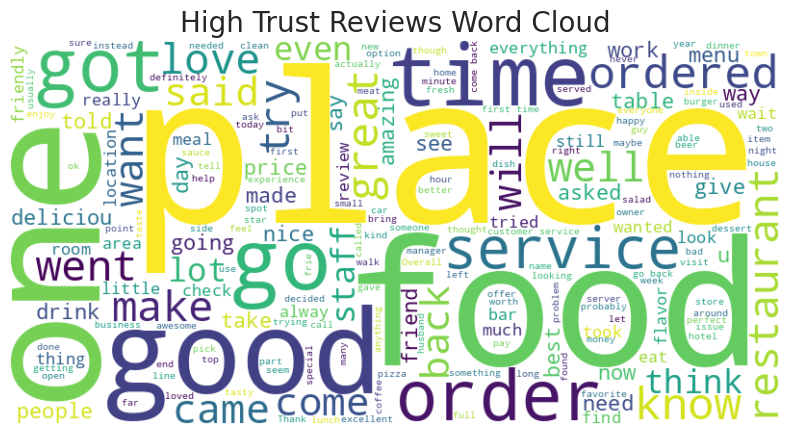

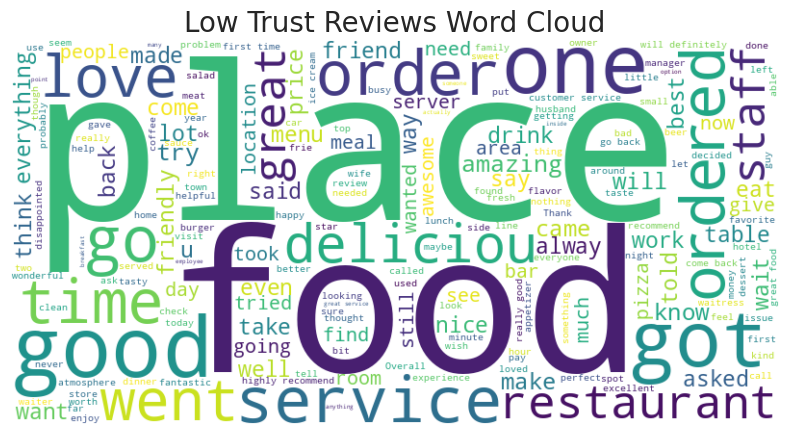

In [ ]:
# 단어 빈도 분석
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

plot_wordcloud(high_trust_reviews['text'], 'High Trust Reviews Word Cloud')
plot_wordcloud(low_trust_reviews['text'], 'Low Trust Reviews Word Cloud')

# 쓸모없는 단어를 지워야 의미가 있을 것 같다.

In [ ]:
# 리뷰의 길이가 trust에 영향을 줄 수 있을까?

subset_review['review_length'] = subset_review['text'].apply(len)

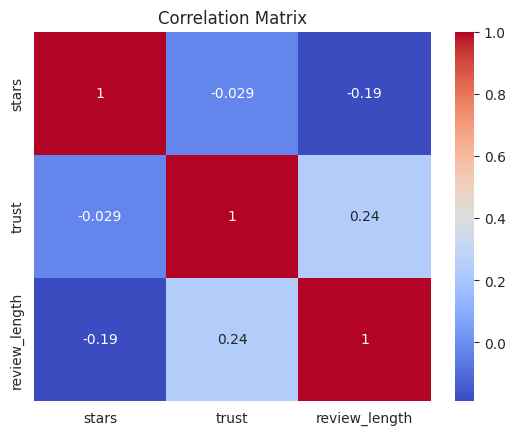

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                 1.302e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:40:42   Log-Likelihood:            -1.2499e+06
No. Observations:              700000   AIC:                         2.500e+06
Df Residuals:                  699997   BIC:                         2.500e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0644      0.003   1599.457

In [ ]:
correlation = subset_review[['stars', 'trust', 'review_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 회귀 분석 trust, review_length로 체크
import statsmodels.api as sm

X = subset_review[['trust', 'review_length']]
X = sm.add_constant(X)
y = subset_review['stars']

model = sm.OLS(y, X).fit()
print(model.summary())

- Dep. Variable (종속 변수) : 만족도가 회귀 모델에서 종속 변수로 사용되었다는 것을 나타낸다.
- Model : 회귀 모델의 종류를 나타낸다. 여기서는 OLS (최소제곱법) 회귀 모델을 사용했다.
- Method : 회귀 분석에 사용된 메소드를 나타낸다. 여기서는 Least Squares (최소제곱법)를 사용했다.
- Date : 회귀 분석이 수행된 날짜
- Time : 회귀 분석이 수행된 시간
- No. Observations : 사용된 샘플의 수 (관측치의 개수)
- Df Residuals : 잔차의 자유도, 모델에서 추정한 파라미터 수를 뺀 값
- Df Model : 모델의 자유도, 사용된 설명 변수의 수
- Covariance Type : 공분산 유형을 나타낸다.



**> 주요 변수**

- coef (계수) : 회귀 계수를 나타낸다. "Intercept"는 절편을, "적절성"은 해당 설명 변수의 회귀 계수를 나타낸다.
- std err (표준 오차) : 회귀 계수의 표준 오차
- t-statistic (t-통계량) : 회귀 계수에 대한 t-통계량을 나타낸다. t-통계량은 해당 계수가 0일 때의 표준 오차에 대한 비율을 나타낸다.
- P>|t| (p-value) : 각 계수에 대한 p-value를 나타낸다. 이 값은 귀무가설이 해당 계수가 0인지에 대한 확률을 나타내며, 일반적으로 0.05보다 작으면 해당 계수는 통계적으로 유의미하다고 판단된다.
[0.025 0.975] : 95% 신뢰구간 (Confidence Interval)을 나타냅니다. 이는 계수가 해당 구간 안에 있을 확률이 95%라는 것을 의미한다.

- R-squared (결정 계수) : 모델이 설명하는 변동의 비율을 나타낸다. 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 것을 의미한다.
- Adj. R-squared (조정된 결정 계수) : R-squared를 보정한 값으로, 모델에 추가된 설명 변수의 수에 대한 보정을 반영한다.
- F-statistic (F-통계량) : 모델 전체의 통계적 유의성을 나타내는 F-통계량이다. 높을수록 모델이 통계적으로 유의미하다는 것을 의미한다.
- Prob (F-statistic) : F-통계량에 대한 p-value를 나타낸다. 이 값이 작으면 모델 전체가 통계적으로 유의미하다고 판단된다.
- Log-Likelihood (로그 우도) : 최대 로그 우도를 나타낸다. 로그 우도가 높을수록 모델이 데이터를 잘 설명하고 있다는 것을 의미한다.
- AIC (Akaike Information Criterion) : 모델의 상대적인 품질을 나타내는 지표 중 하나이다. AIC가 낮을수록 모델이 더 적절하다고 판단된다.
- BIC (Bayesian Information Criterion) : AIC와 유사하게 모델의 상대적인 품질을 나타내는 지표 중 하나이다.
- Omnibus: 잔차의 정규성을 검정하는데 사용되는 값이다. 모델 유의성을 판단할 수 있다.
- Prob(Omnibus) : Omnibus 검정에 대한 p-value를 나타낸다. 0.05보다 작으면 유의하다고 판단된다.
- Durbin-Watson : 잔차의 자기상관을 검정하는데 사용되는 값아다. 잔차의 독립성을 판단할 수 있다.
- Jarque-Bera (JB) : 잔차의 정규성과 첨도에 대한 검정을 수행하는 값입니다. 자기 상관에 대해 판단할 수 있다.
- Prob(JB) : Jarque-Bera 검정에 대한 p-value를 나타낸다. 오차의 정규성 가정을 검정하고, 0.05보다 작으면 유의하다.
- Skew (왜도) : 잔차의 왜도
- Kurtosis (첨도) : 잔차의 첨도
- Cond. No. (Condition Number) : 회귀 행렬의 조건 수를 나타낸다. 이 값이 크면 다중공선성의 가능성이 있을 수 있다.

In [ ]:
X = subset_review[['review_length']]
X = sm.add_constant(X)
y = subset_review['stars']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trust   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                 4.280e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:41:20   Log-Likelihood:            -2.2184e+06
No. Observations:              700000   AIC:                         4.437e+06
Df Residuals:                  699998   BIC:                         4.437e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4706      0.010     46.497

### Topic modeling... 어떻게 해볼 수 있을까?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 데이터 벡터화
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_reviews = vectorizer.fit_transform(subset_review['text'])

# LDA 모델 훈련 (병렬 처리 및 진행 상황 모니터링)
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, verbose=1)
lda.fit(X_reviews)

# 토픽 출력 함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Topic #0:
great place food good service love friendly best delicious coffee
Topic #1:
good food chicken place great ordered like pizza just sauce
Topic #2:
room great place like hotel just nice time staff really
Topic #3:
service time car did told just work called customer said
Topic #4:
food time service just place order good minutes came like


In [ ]:
# 감정 분석 (단순 긍정/부정 단어 수 세기)
positive_words = ['good', 'great', 'excellent', 'amazing', 'fantastic']
negative_words = ['bad', 'poor', 'terrible', 'awful', 'worst']

high_trust_reviews['positive_count'] = high_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in positive_words))
high_trust_reviews['negative_count'] = high_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in negative_words))

low_trust_reviews['positive_count'] = low_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in positive_words))
low_trust_reviews['negative_count'] = low_trust_reviews['text'].apply(lambda x: sum(word in x.lower() for word in negative_words))

print("High Trust Reviews - Positive Word Count: ", high_trust_reviews['positive_count'].mean())
print("High Trust Reviews - Negative Word Count: ", high_trust_reviews['negative_count'].mean())
print("Low Trust Reviews - Positive Word Count: ", low_trust_reviews['positive_count'].mean())
print("Low Trust Reviews - Negative Word Count: ", low_trust_reviews['negative_count'].mean())

# 사람들은 Positive word를 많이 써서 이런 결과가 나오는 걸까?
# 신뢰도 높은 리뷰에 저런 단어가 조금 더 나오는 것 같긴 한데, 일반화 하기 어려운 수치.. word 종류를 늘리고 기준을 바꿔보기도 해야 할듯

High Trust Reviews - Positive Word Count:  0.8907566703876376
High Trust Reviews - Negative Word Count:  0.1735898614485521
Low Trust Reviews - Positive Word Count:  0.863405893143045
Low Trust Reviews - Negative Word Count:  0.12290352337429622


### 긍정적인 리뷰 중에서도 높은 trust 점수를 기록한 경우가 있었는데,

특정 누군가에게 매우 깊은 감명을 준 경우였다.
그리고 그 리뷰를 남긴 유저가 리뷰를 공들여 쓰는 타입인 경우 특별히 많은 것이 보였다.


왜냐면 많은 사람들이 그 리뷰에 대해 공감하는 지표를 남겼기 때문!!



In [ ]:
# text
bus_review_k.drop(columns=['postal_code','latitude','longitude',], inplace=True)

# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [ ]:
bus_review_k.sort_values(by='trust_y', ascending=False).head(10)

business_id           name_x             address  city  \
456371  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456388  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456373  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456374  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456375  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456360  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456377  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456378  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456379  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   
456396  PY9GRfzr4nTZeINf346QOw  Peppermill Reno  2707 S Virginia St  Reno   

       state  stars_x  review_count  is_open  \
456371    NV      4.0          2486        1   
456388    NV      4.0          2486        1   
456373    NV      4.0          2486        1   
456374    NV      4.0          2486        1   
456375    NV      4.0          2486        1   
456360    NV      4.0          2486        1   
456377    NV      4.0          2486        1   
456378    NV      4.0          2486        1   
456379    NV      4.0          2486        1   
456396    NV      4.0          2486        1   

                                               attributes  \
456371  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456388  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456373  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456374  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456375  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456360  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456377  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456378  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456379  {'RestaurantsPriceRange2': '2', 'ByAppointment...   
456396  {'RestaurantsPriceRange2': '2', 'ByAppointment...   

                                               categories  ... stars_y useful  \
456371  Event Planning & Services, Casinos, Beauty & S...  ...       2      1   
456388  Event Planning & Services, Casinos, Beauty & S...  ...       4      0   
456373  Event Planning & Services, Casinos, Beauty & S...  ...       5      0   
456374  Event Planning & Services, Casinos, Beauty & S...  ...       4      0   
456375  Event Planning & Services, Casinos, Beauty & S...  ...       3      1   
456360  Event Planning & Services, Casinos, Beauty & S...  ...       5      2   
456377  Event Planning & Services, Casinos, Beauty & S...  ...       4      0   
456378  Event Planning & Services, Casinos, Beauty & S...  ...       3      0   
456379  Event Planning & Services, Casinos, Beauty & S...  ...       4      5   
456396  Event Planning & Services, Casinos, Beauty & S...  ...       5      1   

       funny  cool                                               text  \
456371     0     1  This is my favorite place to go, for the momen...   
456388     0     0  This is the best hotel in Reno to stay. But th...   
456373     0     0  The Peppermill is by far the best casino/resor...   
456374     0     0  This is a beautiful place and we really enjoye...   
456375     0     0  Here I am reviewing again. I'm always here 2-3...   
456360     0     0  My favorite hotel/casino in our area, have sta...   
456377     0     0  Our room in the Tuscany Tower was beautiful. I...   
456378     0     0  Clean rooms and conveniently located down the ...   
456379     2     6  I am not a gambler so I do not know... about h...   
456396     1     1  We've been to Tuscany Towers a few times and e...   

                      date  trust_x           name_y trust_y  trust_div  
456371 2013-08-26 20:51:03        2  Peppermill Reno    6919   2.783186  
456388 2010-02-24 17:06:16        0  Peppermill Reno    6919   2.783186  
456373 2012-09-12 18:47:02        0  Peppermill Reno

In [ ]:
# #attributes에 있는 key를 뽑아서 사용하기 위해 함수 등록

## Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast

def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")

In [ ]:
## 카테고리로 histogram
#subset_business
df_rest = pd.Series(subset_business['categories']).str.get_dummies(',')

# #'Restaurants'와 'Food' 같은 공통적인 열을 제거하고, 중복되는 카테고리를 합산했음
# df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# 열 이름에서 공백 제거를 해서 저장시키기
df_rest.columns = df_rest.columns.str.lstrip()

# 열 이름이 동일한 경우 합치기
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()
all_rest

& Probates  3D Printing  ATV Rentals/Tours  Acai Bowls  Accessories  \
0                0            0                  0           0            0   
1                0            0                  0           0            0   
2                0            0                  0           0            0   
3                0            0                  0           0            0   
4                0            0                  0           0            0   
...            ...          ...                ...         ...          ...   
150341           0            0                  0           0            0   
150342           0            0                  0           0            0   
150343           0            0                  0           0            1   
150344           0            0                  0           0            0   
150345           0            0                  0           0            0   

        Accountants  Acne Treatment  Active Life  Acupuncture  \
0                 0               0            0            1   
1                 0               0            0            0   
2                 0               0            0            0   
3                 0               0            0            0   
4                 0               0            0            0   
...             ...             ...          ...          ...   
150341            0               0            0            0   
150342            0               0            0            0   
150343            0               0            0            0   
150344            0               0            0            0   
150345            0               0            0            0   

        Addiction Medicine  ...  Wine Tasting Room  Wine Tours  Wineries  \
0                        0  ...                  0           0         0   
1                        0  ...                  0           0         0   
2                        0  ...                  0           0         0   
3                        0  ...                  0           0         0   
4                        0  ...                  0           0         0   
...                    ...  ...                ...         ...       ...   
150341                   0  ...                  0           0         0   
150342                   0  ...                  0           0         0   
150343                   0  ...                  0           0         0   
150344                   0  ...                  0           0         0   
150345                   0  ...                  0           0         0   

        Women's Clothing  Workers Compensation Law  Wraps  Yelp Events  Yoga  \
0                      0                         0      0            0     0   
1                      0                         0      0            0     0   
2                      0                         0      0            0     0   
3                      0                         0      0            0     0   
4                      0                         0      0            0     0   
...                  ...                       ...    ...          ...   ...   
150341                 0                         0      0            0     0   
150342                 0                         0      0            0     0   
150343                 0                         0      0            0     0   
150344                 0                         0      0            0     0   
150345                 0                         0      0            0     0   

        Ziplining  Zoos  
0               0     0  
1               0     0  
2               0     0  
3               0     0  
4               0     0  
...           ...   ...  
150341          0     0  
150342          0     0  
150343          0     0  
150344          0     0  
150345          0     0  

[150346 rows x 1311 columns]

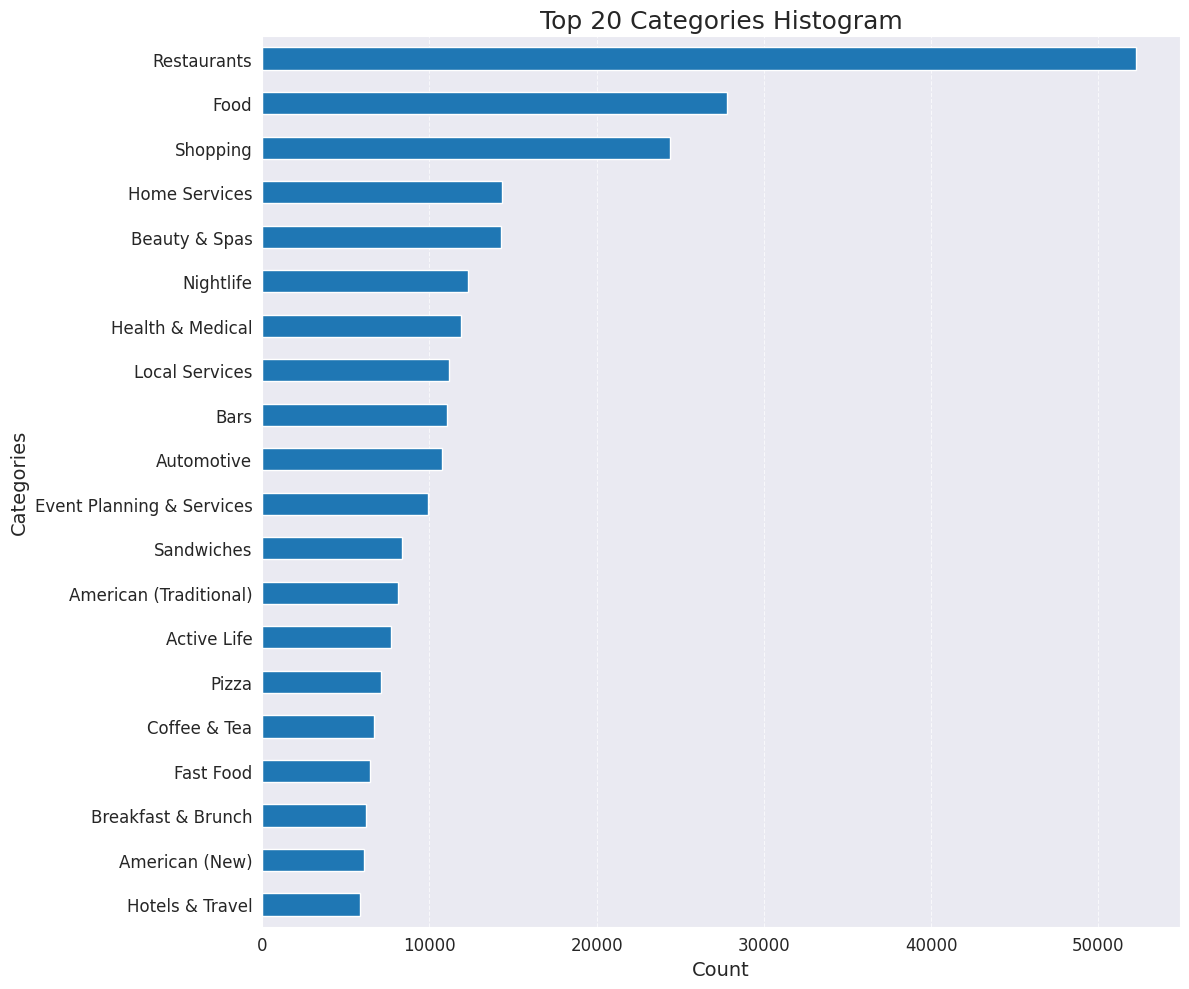

In [ ]:
#duckdb
import matplotlib.pyplot as plt

# 상위 20개의 카테고리 선택
top_categories = category_counts.head(20).sort_values(ascending=True)

# 히스토그램 그리기
plt.figure(figsize=(12,10))
top_categories.plot(kind='barh')
plt.title('Top 20 Categories Histogram', fontsize=18)
plt.ylabel('Categories', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 데이터 사용 기간
##

In [ ]:
## 리뷰 키워드를 추출해서
# 카테고리별로 가게별 리뷰 수
# 음식이 제일 작게?
# 배달은 음식에서 벗어나고 있다.

# - 각자 정리한 내용 들어보고, 이를 바탕으로 쓸 수 있는 정보 정리하기
# -> useful, cool, funny


# - 어떻게 "리뷰"를 요약하면 좋을지 결정하기
# - 기획 문서 정리 및 다음주 플래닝 관련 방식 이야기하기

In [ ]:
### feature

#

In [ ]:
#

### user별 리뷰 개수 정리

- 유저별로 useful을 받은 리뷰 개수, 등등 이런걸로 모아둠

In [ ]:
user_agg=subset_review.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [ ]:
user_agg

review_id                date                      \
                           count                 min                 max   
user_id                                                                    
---2PmXbF47D870stH1jqA         3 2014-07-10 04:15:23 2015-06-27 23:38:13   
---UgP94gokyCDuB5zUssA         2 2014-11-02 15:10:18 2014-11-10 02:49:07   
---r61b7EpVPkb4UVme5tA         1 2014-05-06 14:00:28 2014-05-06 14:00:28   
--0Jj_J_MmUJ51f1Y394Uw         1 2021-04-19 14:33:52 2021-04-19 14:33:52   
--1orhUoGFSdHXsoxqQc8g         1 2015-05-03 03:53:01 2015-05-03 03:53:01   
...                          ...                 ...                 ...   
zztkCqqgR6VntYbqio4UTQ         5 2017-09-01 22:03:40 2018-12-20 00:26:43   
zzvLsOhm7gBMQDygMBDrHg         1 2018-06-30 17:00:05 2018-06-30 17:00:05   
zzwRb-I0b_zDe41VLRB76A         1 2018-10-06 14:48:19 2018-10-06 14:48:19   
zzxUT-fFNXpp5i5xJHmvpA         1 2016-03-19 15:28:38 2016-03-19 15:28:38   
zzz-M4QvkEpUWWPL9RTzLA         1 2014-03-10 16:55:18 2014-03-10 16:55:18   

                       useful funny cool stars  
                          sum   sum  sum  mean  
user_id                                         
---2PmXbF47D870stH1jqA      1     0    1   5.0  
---UgP94gokyCDuB5zUssA      2     0    0   3.5  
---r61b7EpVPkb4UVme5tA      0     0    0   4.0  
--0Jj_J_MmUJ51f1Y394Uw      0     0    0   5.0  
--1orhUoGFSdHXsoxqQc8g      3     0    1   1.0  
...                       ...   ...  ...   ...  
zztkCqqgR6VntYbqio4UTQ      0     0    0   4.8  
zzvLsOhm7gBMQDygMBDrHg      0     0    0   1.0  
zzwRb-I0b_zDe41VLRB76A      0     0    0   5.0  
zzxUT-fFNXpp5i5xJHmvpA      0     0    0   3.0  
zzz-M4QvkEpUWWPL9RTzLA      1     1    1   2.0  

[422630 rows x 7 columns]

In [ ]:
user_agg.columns

# multiIndex라면 튜플로 지정해줘야 한다

MultiIndex([('review_id', 'count'),
            (     'date',   'min'),
            (     'date',   'max'),
            (   'useful',   'sum'),
            (    'funny',   'sum'),
            (     'cool',   'sum'),
            (    'stars',  'mean')],
           )

In [ ]:
user_agg = user_agg.sort_values(by=('useful', 'sum'),ascending=False)

## 'Age' 열을 기준으로 오름차순 정렬
#df_sorted_by_age = df.sort_values(by='Age')

In [ ]:
user_agg

review_id                date                      \
                           count                 min                 max   
user_id                                                                    
-G7Zkl1wIWBBmD0KRy_sCw       182 2012-12-22 21:01:00 2021-11-06 17:40:50   
ET8n-r7glWYqZhuR6GcdNw       194 2008-04-09 14:43:29 2020-11-24 21:30:58   
A4bsa7ykYRVCnb4h2vZALw        31 2011-03-01 05:20:13 2021-12-14 18:10:39   
vHc-UrI9yfL_pnnc6nJtyQ       119 2011-02-12 02:33:58 2021-11-04 05:06:24   
fr1Hz2acAb3OaL3l6DyKNg       161 2014-11-14 20:04:26 2022-01-07 16:00:17   
...                          ...                 ...                 ...   
_rtt_YoGjCi5tPl53RYkHQ         2 2013-05-03 22:54:12 2013-05-07 15:27:25   
EC4Wr69Rt2vHHy5nTQIVNA         1 2020-11-17 21:55:10 2020-11-17 21:55:10   
EC4QQKhlMrbK7cXtmp7Rsw         1 2017-09-11 19:36:48 2017-09-11 19:36:48   
EC3ANOTSiGeozW9rjD4FVw         1 2017-01-04 02:42:33 2017-01-04 02:42:33   
UvAzKT4njYQgG-ISMcBjHw         1 2021-12-06 11:05:29 2021-12-06 11:05:29   

                       useful funny  cool     stars  
                          sum   sum   sum      mean  
user_id                                              
-G7Zkl1wIWBBmD0KRy_sCw   3605  1882  2815  3.796703  
ET8n-r7glWYqZhuR6GcdNw   2303   717  1525  4.154639  
A4bsa7ykYRVCnb4h2vZALw   2154  1502  2092  4.193548  
vHc-UrI9yfL_pnnc6nJtyQ   1986   514  1329  4.352941  
fr1Hz2acAb3OaL3l6DyKNg   1784   517  1525  3.944099  
...                       ...   ...   ...       ...  
_rtt_YoGjCi5tPl53RYkHQ      0     0     0  1.000000  
EC4Wr69Rt2vHHy5nTQIVNA      0     0     0  5.000000  
EC4QQKhlMrbK7cXtmp7Rsw      0     0     0  4.000000  
EC3ANOTSiGeozW9rjD4FVw      0     0     1  4.000000  
UvAzKT4njYQgG-ISMcBjHw      0     0     0  5.000000  

[422630 rows x 7 columns]

In [ ]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id                date                      \
                           count                 min                 max   
user_id                                                                    
_BcWyKQL16ndpBdggh2kNA       329 2008-05-29 15:15:17 2021-12-14 21:09:57   
ET8n-r7glWYqZhuR6GcdNw       194 2008-04-09 14:43:29 2020-11-24 21:30:58   
-G7Zkl1wIWBBmD0KRy_sCw       182 2012-12-22 21:01:00 2021-11-06 17:40:50   
Xw7ZjaGfr0WNVt6s_5KZfA       176 2011-01-12 05:33:54 2021-09-22 19:28:09   
0Igx-a1wAstiBDerGxXk2A       170 2009-01-14 20:00:48 2021-09-15 19:15:36   
bYENop4BuQepBjM1-BI3fA       168 2010-08-08 22:48:41 2022-01-13 16:14:17   
fr1Hz2acAb3OaL3l6DyKNg       161 2014-11-14 20:04:26 2022-01-07 16:00:17   
1HM81n6n4iPIFU5d2Lokhw       147 2011-08-12 14:43:53 2021-12-18 03:57:04   
Um5bfs5DH6eizgjH3xZsvg       146 2012-11-18 17:38:52 2021-09-29 18:23:19   
wXdbkFZsfDR7utJvbWElyA       142 2016-06-12 11:28:59 2021-10-16 08:13:18   

                       useful funny  cool     stars  
                          sum   sum   sum      mean  
user_id                                              
_BcWyKQL16ndpBdggh2kNA   1087   326   629  3.711246  
ET8n-r7glWYqZhuR6GcdNw   2303   717  1525  4.154639  
-G7Zkl1wIWBBmD0KRy_sCw   3605  1882  2815  3.796703  
Xw7ZjaGfr0WNVt6s_5KZfA   1210   467   691  4.056818  
0Igx-a1wAstiBDerGxXk2A    776   321   482  4.052941  
bYENop4BuQepBjM1-BI3fA   1331   476   974  3.815476  
fr1Hz2acAb3OaL3l6DyKNg   1784   517  1525  3.944099  
1HM81n6n4iPIFU5d2Lokhw    553   215   296  3.006803  
Um5bfs5DH6eizgjH3xZsvg    456   198   323  3.815068  
wXdbkFZsfDR7utJvbWElyA    561    33   300  4.267606

In [ ]:
#Stalking the top user:
top_user_reviews=subset_review[subset_review['user_id']=='_BcWyKQL16ndpBdggh2kNA']
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,business,on='business_id')
# UNique list of dates from the user's reviews
date_list=list(top_user_locs['date'].unique())
#rearranging data to suit the format needed for folium
data=[]
for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date']]
    data.append(subset[['latitude','longitude']].values.tolist())

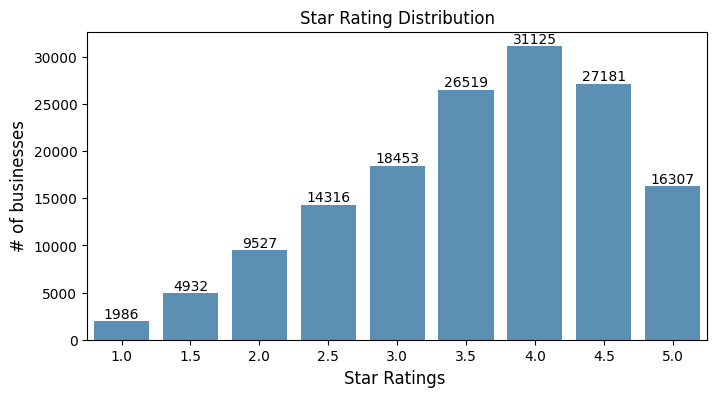

In [ ]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x= x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
display(subset_business.head(2))
# dictionary에 다양한 정보가 저장되어 있음.


display(subset_review.head(2))
display(subset_user.head(2))
display(subset_checkin.head(2))

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   

                               attributes  \
0           {'ByAppointmentOnly': 'True'}   
1  {'BusinessAcceptsCreditCards': 'True'}   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  

[2 rows x 22 columns]

business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...

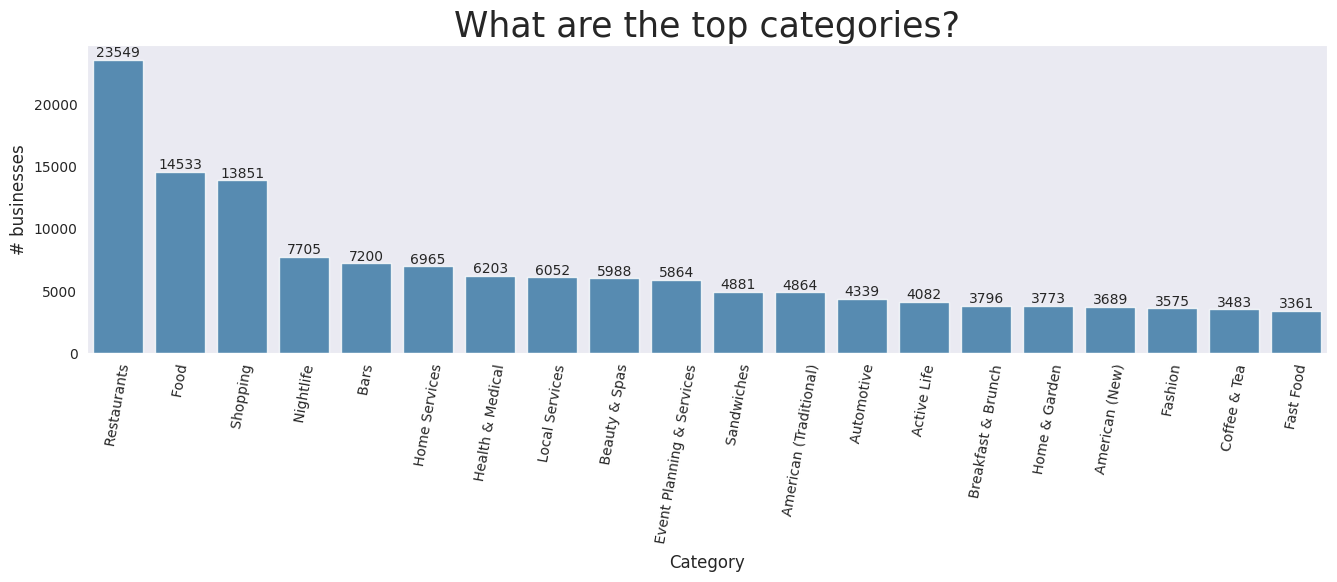

In [ ]:
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# 레스토랑, 음식 관련 category가 많다

## 어떤 지역에서 리뷰가 많을까?

1. 가게들이 어디에 몰려 있는지 보자.
2. 특정 지역을 정해서 카테고리별로 정리해보면서 카테고리별 지역 인기랭킹을 뽑아보자


In [ ]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings

#vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.gridspec as gridspec

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

%matplotlib inline

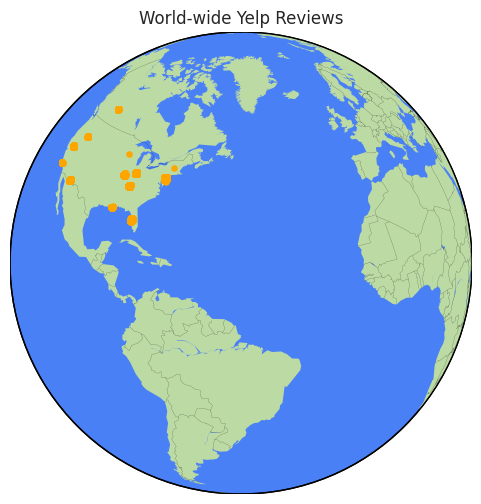

In [ ]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5')
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

### 미국 쪽 데이터만 계속 잡힘..
# 비즈니스 id 개수는 전부 다 가져왔는데, 미국만 보이는 걸로 봐선 미국 쪽 데이터만 있는듯

In [ ]:
# 북미 지역 기준으로 더 디테일하게 그려보기
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")
## 지역을 뽑아봤더니 뉴욕 지역,이나 유명한 지역에서 많이 찍히는 것을 확인할 수 있었다.
# 이 지역이 어디지?

Text(0.5, 1.0, 'North America Region')

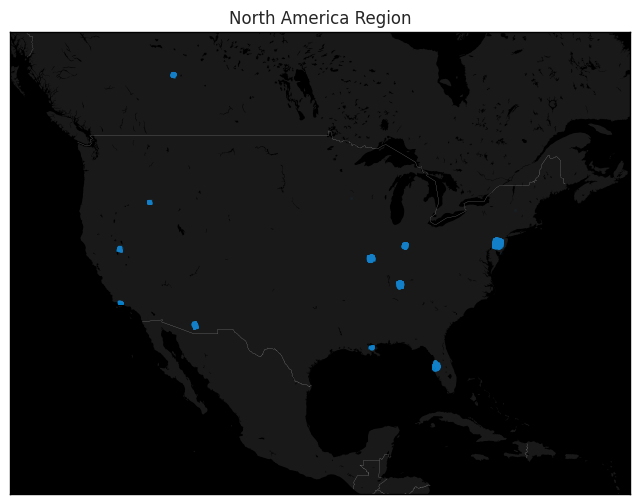

In [ ]:
### yelp dataset에 있는 가게들은 특정 지역에 몰려있는 걸 확인할 수 있었다.

# 저기 캐나다에 하나 잡히는 건 뭐지...

## 음식점의 카테고리별로 지역 인기 랭킹 뽑아보기

In [ ]:
## 우선 음식점 리뷰만 정제해서 보자.. 카테고리에서 Rest라는 걸 포함하고 있는건 다 가져오기
all_cities = subset_business[subset_business['categories'].str.contains('Rest.*')==True]

# 한 셀에 들어있는 카테고리에서 각 레스토랑이 속한 다양한 카테고리를 분석할 수 있도록 원-핫 인코딩을 사용
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

#'Restaurants'와 'Food' 같은 공통적인 열을 제거하고, 중복되는 카테고리를 합산했음
df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)

# 열 이름에서 공백 제거를 해서 저장시키기
df_rest.columns = df_rest.columns.str.lstrip()

# 열 이름이 동일한 경우 합치기
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [ ]:
all_cities[all_cities['is_open']==0]

# 리뷰어의 팬, friends, 가입 연도 : 팬은 숫자 , friends 목록이 있음.
  # 이런게 많으면 리뷰가 더 의미가 있을 것이다?
  # 친구랑 팬이 많으면 그 사람이 남긴 리뷰에 -> elite 일 가능성?
  # elite -> 부정

### attributes : 옵션 기능?

# checkin은 있는데 리뷰는 없다
# 리뷰는 있는데 checkin이 없는 경우 : 오프라인에서 방문하고 따로 리뷰만 여기서 쓴거

business_id                            name  \
8       k0hlBqXX-Bt0vf1op7Jr1w           Tsevi's Pub And Grill   
14      0bPLkL0QhhPO5kt1_EXmNQ            Zio's Italian Market   
20      WKMJwqnfZKsAae75RMP6jA  Roast Coffeehouse and Wine Bar   
24      4iRzR7OaS-QaSXuvYxEGKA                       Super Dog   
27      tMkwHmWFUEXrC9ZduonpTg              The Green Pheasant   
...                        ...                             ...   
150291  -R9t30RvsG-Rtiq63yuEmg   Crescent No Lawyers Bar-Grill   
150298  gPr1io7ks0Eo3FDsnDTYfg                       Tata Cafe   
150319  8n93L-ilMAsvwUatarykSg                     Kitchen Gia   
150322  2MAQeAqmD8enCT2ZYqUgIQ     The Melting Pot - Nashville   
150340  hn9Toz3s-Ei3uZPt7esExA           West Side Kebab House   

                      address          city state postal_code   latitude  \
8           8025 Mackenzie Rd        Affton    MO       63123  38.565165   
14              2575 E Bay Dr         Largo    FL       33771  27.916116   
20        10359 104 Street NW      Edmonton    AB     T5J 1B9  53.546045   
24       1160 Gallatin Pike S     Nashville    TN       37115  36.248570   
27              215 1st Ave S     Nashville    TN       37201  36.159886   
...                       ...           ...   ...         ...        ...   
150291     5500 W Franklin Rd         Boise    ID       83706  43.603368   
150298    7201 Germantown Ave  Philadelphia    PA       19119  40.060414   
150319         3716 Spruce St  Philadelphia    PA       19104  39.951018   
150322   166 2nd Ave N, Ste A     Nashville    TN       37201  36.163875   
150340  2470 Guardian Road NW      Edmonton    AB     T5T 1K8  53.509649   

         longitude  stars  review_count  is_open  \
8       -90.321087    3.0            19        0   
14      -82.760461    4.5           100        0   
20     -113.499169    4.0            40        0   
24      -86.719986    4.0             6        0   
27      -86.773197    4.0           161        0   
...            ...    ...           ...      ...   
150291 -116.250063    2.5            55        0   
150298  -75.191084    4.0            21        0   
150319  -75.198240    3.0            22        0   
150322  -86.776311    4.0           204        0   
150340 -113.675999    4.5            18        0   

                                               attributes  \
8       {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...   
14      {'OutdoorSeating': 'False', 'RestaurantsGoodFo...   
20      {'OutdoorSeating': 'False', 'Caters': 'True', ...   
24      {'RestaurantsReservations': 'False', 'Restaura...   
27      {'RestaurantsGoodForGroups': 'True', 'HappyHou...   
...                                                   ...   
150291  {'RestaurantsPriceRange2': '2', 'BikeParking':...   
150298  {'RestaurantsGoodForGroups': 'True', 'Business...   
150319  {'RestaurantsGoodForGroups': 'True', 'BikePark...   
150322  {'RestaurantsDelivery': 'False', 'RestaurantsR...   
150340  {'Ambience': '{'touristy': False, 'hipster': F...   

                                               categories  \
8       Pubs, Restaurants, Italian, Bars, American (Tr...   
14            Food, Delis, Italian, Bakeries, Restaurants   
20      Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...   
24                                  Hot Dogs, Restaurants   
27                         Restaurants, Japanese, Seafood   
...                                                   ...   
150291  American (Traditional), Nightlife, Bars, Resta...   
150298                   Sandwiches, Restaurants, Italian   
150319  Coffee & Tea, Food, Sandwiches, American (Trad...   
150322    Fondue, Beer, Wine & Spirits, Food, Restaurants   
150340                        Middle Eastern, Restaurants   

                                                    hours  
8                                                    None  
14      {'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...  
20      {'Monday': '8:0-18:0', 'Tuesday': 

In [ ]:
# 도시 이름만 가져와보기
from_business = all_cities[['city']]

In [ ]:
# 바비큐집이 가장 많은 곳이 어디지?
all_rest.join(from_business).groupby('city').sum()['Barbeque'].sort_values(ascending=False).head(10)

city
Philadelphia    133
Nashville       118
Tampa           100
Indianapolis     92
Saint Louis      91
Tucson           76
New Orleans      61
Reno             43
Edmonton         38
Boise            33
Name: Barbeque, dtype: int64

In [ ]:
all_rest.join(from_business).groupby('city').sum()['Burgers'].sort_values(ascending=False).head(10)

# 버거 카테고리는 바비큐보다 3배나 많네
# 바비큐랑 다르게 버거는 인디에나 폴리스에 제일 많다

city
Indianapolis    393
Philadelphia    363
Tucson          290
Tampa           285
Nashville       271
Edmonton        207
New Orleans     202
Saint Louis     139
Reno            137
Boise           124
Name: Burgers, dtype: int64

In [ ]:
# 맥주집은 어디에 젤 많을까?
all_rest.join(from_business).groupby('city').sum()['Pubs'].sort_values(ascending=False).head(10)

# 바비큐, 버거, 맥주 둘다 많다고 나오는 쪽은 우선 가게가 많은 곳일 수 있겠다..

city
Philadelphia    176
Indianapolis    103
Saint Louis      81
Edmonton         81
Nashville        76
Tampa            60
Tucson           40
New Orleans      39
Reno             39
Boise            25
Name: Pubs, dtype: int64

In [ ]:
## 필라델피아, 인디에나 폴리스, 새인트 루이스가 자주 등장하니까, 이 세 곳이 핫플로 보인다.

# 필라델피아 버거 핫플
Philadelphia = all_rest.join(subset_business)[all_rest.join(subset_business)['city'] == 'Philadelphia']
phi_1 = Philadelphia[['Burgers','name','address','latitude','longitude','stars','is_open','hours','review_count']]

# 평점으로 정렬하기
phi_1[ (phi_1['Burgers']==1) & (Philadelphia['is_open']==1) ].sort_values(by='stars',ascending=False).head(10)

## 리뷰가 92개나 있는데, 평균 평점이 5.0??? 반올림 처리를 하는걸까?
## SPOT Gourmet Burgers 는 리뷰가 282개나 있는데, 4.5점이네
# 리뷰수도 많고 별점도 높으면 맛집 기준에 넣을 수 있지 않을까?

Burgers                   name  \
125809        1            Bad Brother   
4559          1           Tony Express   
13510         1  Algorithm Restaurants   
61657         1            Dairy Queen   
13980         1               Richie's   
8944          1          Ace of Steaks   
9473          1  Justin's Snack Corner   
50109         1          Johnny's Hots   
10886         1   SPOT Gourmet Burgers   
42122         1          Hatville Deli   

                                                  address   latitude  \
125809                                      726 N 24th St  39.968629   
4559                                      3334 N Broad St  40.004478   
13510                                                      40.116933   
61657                                      1619 Grant Ave  40.087388   
13980   1835 N 12th St, Ste 9, Temple University Main ...  39.980916   
8944                                      3020 S Broad St  39.912641   
9473                                        601 S 52nd St  39.950296   
50109                                 1234 N Delaware Ave  39.967316   
10886                                   2821 W Girard Ave  39.974710   
42122                                        1136 Arch St  39.953469   

        longitude  stars  is_open  \
125809 -75.176888    5.0        1   
4559   -75.152804    5.0        1   
13510  -75.355294    5.0        1   
61657  -75.039926    4.5        1   
13980  -75.153284    4.5        1   
8944   -75.172892    4.5        1   
9473   -75.226655    4.5        1   
50109  -75.129374    4.5        1   
10886  -75.182570    4.5        1   
42122  -75.159245    4.5        1   

                                                    hours  review_count  
125809  {'Wednesday': '17:0-0:0', 'Thursday': '17:0-0:...            92  
4559    {'Monday': '8:0-18:45', 'Tuesday': '8:0-18:45'...             8  
13510   {'Monday': '12:0-17:0', 'Tuesday': '12:0-21:0'...            10  
61657   {'Monday': '12:0-21:30', 'Tuesday': '12:0-21:3...            12  
13980   {'Monday': '6:0-18:0', 'Tuesday': '6:0-18:0', ...            50  
8944    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...            31  
9473    {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...             7  
50109   {'Monday': '4:30-15:0', 'Tuesday': '4:30-15:0'...            91  
10886   {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...           282  
42122   {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...            76

In [ ]:
#Creating dataset with the data for different cities for further analysis
cities=['Philadelphia','Indianapolis','Tucson']
df_cities=[]

for c in cities:
    city = subset_business[subset_business['city']==c]
    rest = city[city['categories'].str.contains('Rest.*')==True]
    df = pd.Series(rest['categories']).str.get_dummies(',')
    df.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)
    df.columns = df.columns.str.lstrip()
    result = df.groupby(by=df.columns, axis=1).sum()
    df_cities.append(result)

 # Creating separate dataframe for each city.
phila, india, tuc = df_cities[0], df_cities[1], df_cities[2]

In [ ]:
phi = pd.DataFrame(phila.sum().sort_values(ascending=False).head(20),columns=['counts'])
phi.reset_index(inplace=True)
phi.rename({'index':'name'}, axis=1, inplace=True)
phi

# 유흥(Nightlife)이라는 카테고리를 가진 곳이 1037개나 되네
# 나이트클럽, 극장, 레스토랑을 포함하여 마을이나 도시에서 밤에 할 수 있는 사교 활동이나 오락
# 넓은 범위의 카테고리라서 많은 것으로 판단된다.
# 버거는 11위 카테고리 정도

name  counts
0                   Nightlife    1037
1                        Bars     981
2                  Sandwiches     929
3                       Pizza     800
4              American (New)     751
5          Breakfast & Brunch     686
6      American (Traditional)     663
7                Coffee & Tea     575
8                     Italian     505
9                     Chinese     471
10                  Fast Food     367
11                    Burgers     363
12                    Seafood     359
13                      Cafes     323
14                    Mexican     315
15                      Delis     308
16  Event Planning & Services     307
17                      Salad     280
18             Specialty Food     272
19              Chicken Wings     240

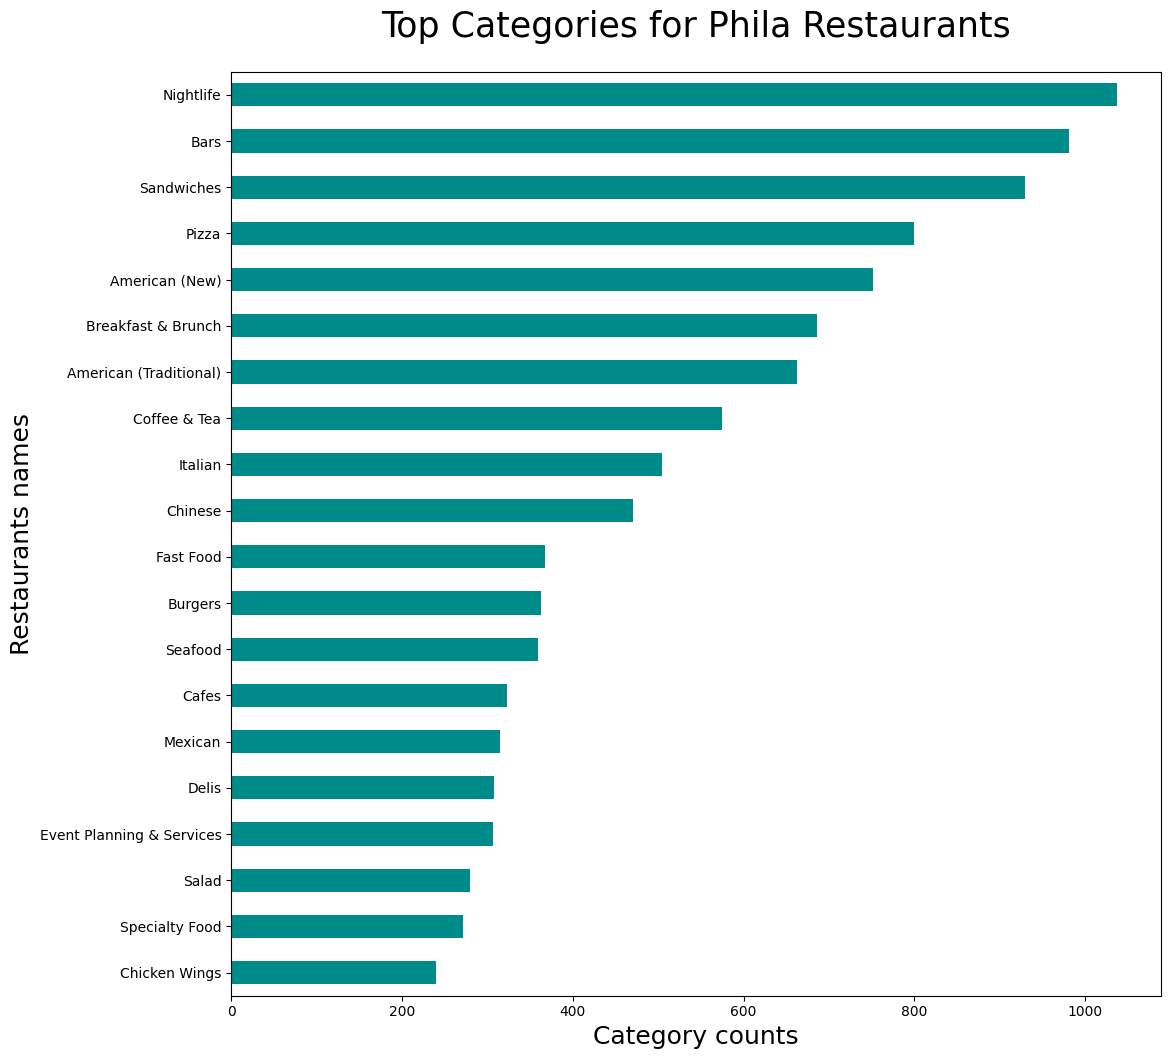

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(12,12))

# Visualizing 20 most popular Categories in Phila Restaurants
phila.sum().sort_values(ascending=True).tail(20).plot(kind='barh', color='Darkcyan', ax=ax)
ax.set_title('Top Categories for Phila Restaurants', fontsize=25, pad=25.0)
ax.set_xlabel("Category counts", fontsize=18)
ax.set_ylabel("Restaurants names", fontsize=18)

plt.show()

Text(0, 0.5, 'Restaurants names')

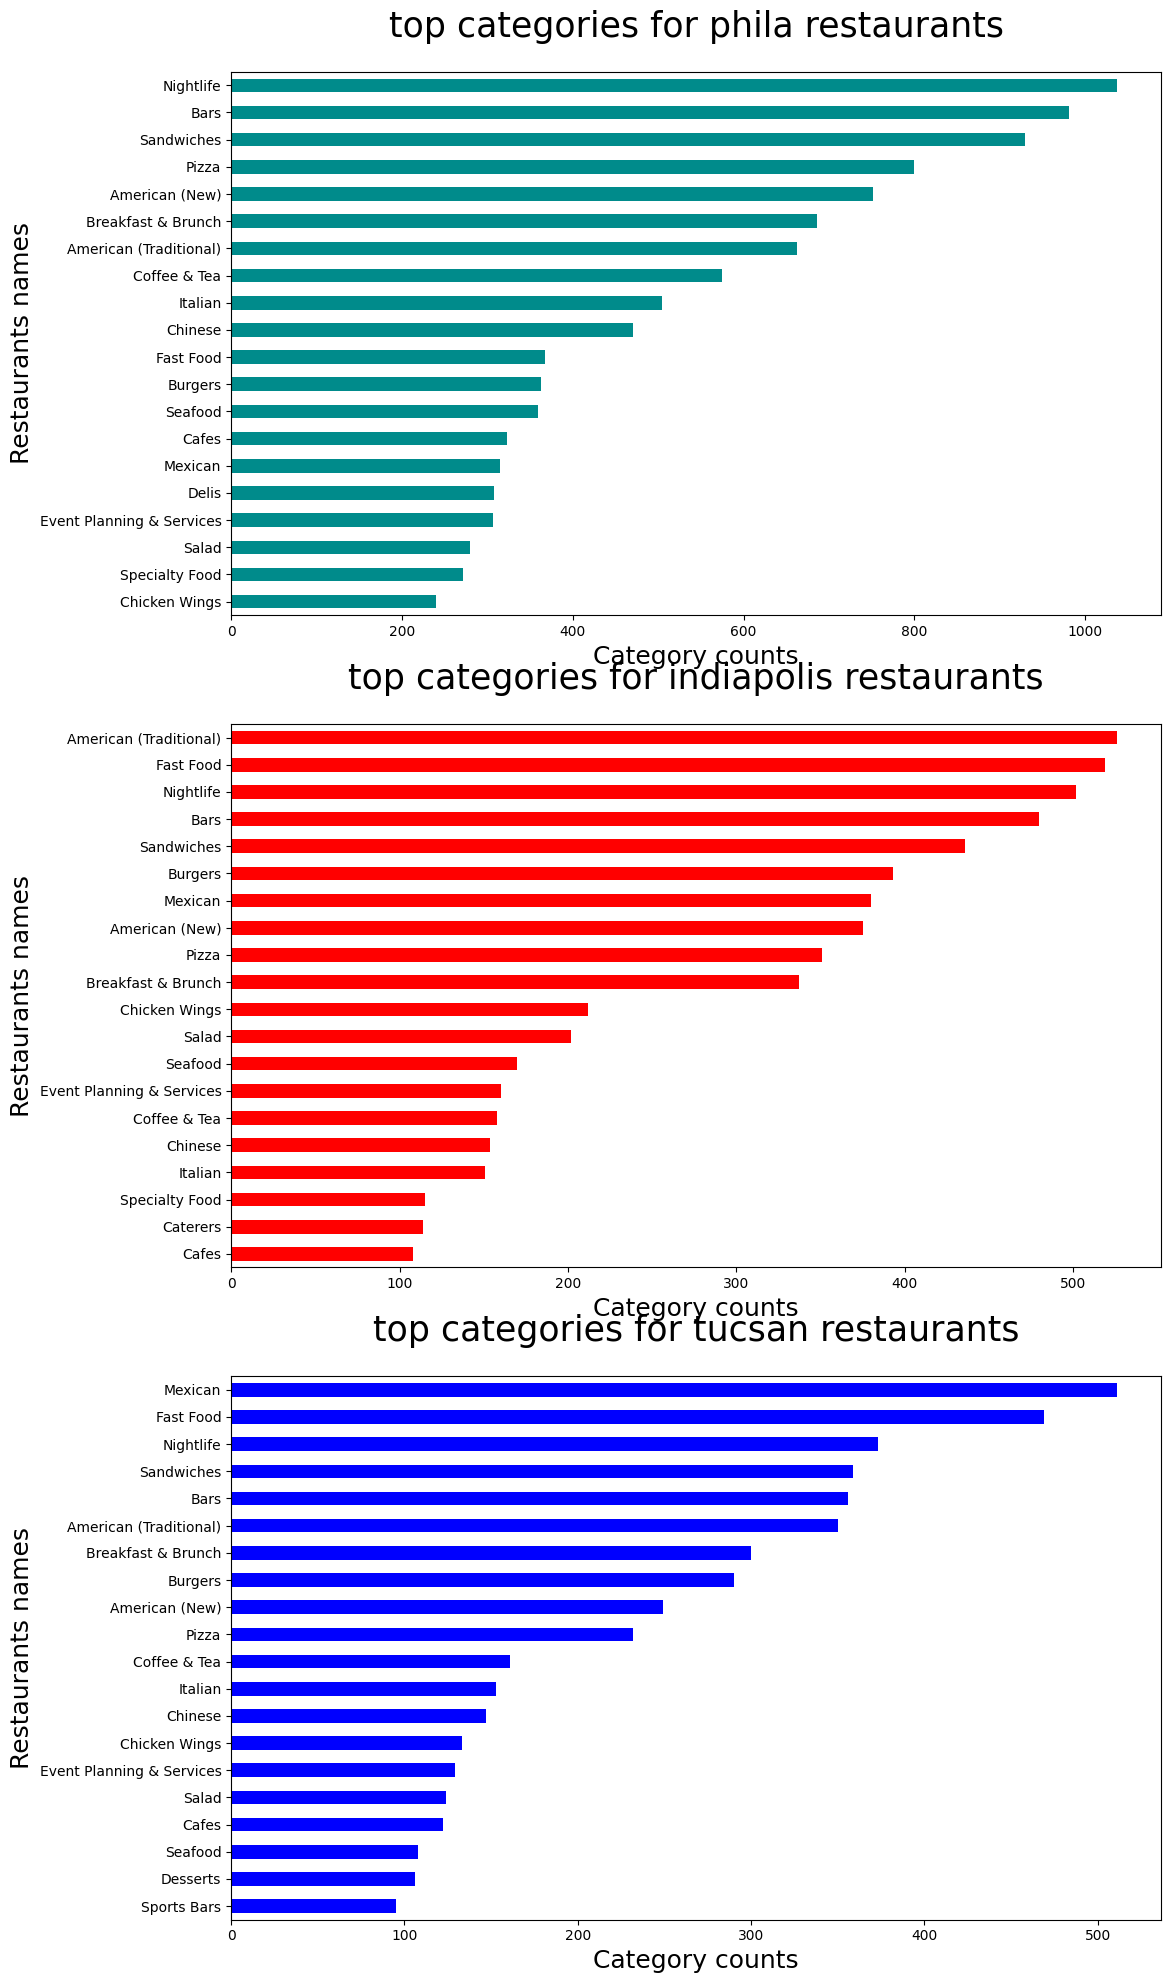

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,24))

#plt.barh(tor['name'], tor['counts'],color='Darkcyan')
phila.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='Darkcyan',ax=axes[0])
axes[0].set_title('top categories for phila restaurants',fontsize=25, pad=25.0)
axes[0].xaxis.set_label_text("Category counts", fontsize=18)
axes[0].yaxis.set_label_text("Restaurants names", fontsize=18)

india.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='red',ax=axes[1])
axes[1].set_title('top categories for indiapolis restaurants',fontsize=25, pad=25.0)
axes[1].xaxis.set_label_text("Category counts", fontsize=18)
axes[1].yaxis.set_label_text("Restaurants names", fontsize=18)

tuc.sum().sort_values(ascending=True).tail(20).plot(kind='barh',color='blue',ax=axes[2])
axes[2].set_title('top categories for tucsan restaurants',fontsize=25, pad=25.0)
axes[2].xaxis.set_label_text("Category counts", fontsize=18)
axes[2].yaxis.set_label_text("Restaurants names", fontsize=18)

In [ ]:
#get all ratings data
# 리뷰 별점도 높고 리뷰도 많으면 유명한 곳이지 않을까?

rating_data=business[['name','latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

In [ ]:
sorted_rating_data = rating_data.sort_values(by='popularity', ascending=False)
sorted_rating_data.head(10)

# stars와 review_count를 그냥 곱해서 계산하면
# 최근의 점수를 반영하기 힘들고 오래된 가게 일수록 높을 수 밖에 없음
# 더 좋은 가게를 찾아 낼 수 있는 지표를 만든다면 뭐가 있을까?

name   latitude  longitude  stars  \
113731                   Acme Oyster House  29.954273 -90.068965    4.0   
112552                        Oceana Grill  29.956231 -90.067563    4.0   
91757   Hattie B’s Hot Chicken - Nashville  36.151387 -86.796603    4.5   
143157             Reading Terminal Market  39.953341 -75.158855    4.5   
147081          Ruby Slipper - New Orleans  29.951025 -90.067394    4.5   
31332                   Commander's Palace  29.928735 -90.084196    4.5   
31033                          Royal House  29.956473 -90.066386    4.0   
4497                                  Luke  29.950742 -90.070416    4.0   
100024                 Mother's Restaurant  29.949057 -90.067049    3.5   
132673                  Pappy's Smokehouse  38.635147 -90.224003    4.5   

        review_count  popularity  
113731          7568     30272.0  
112552          7400     29600.0  
91757           6093     27418.5  
143157          5721     25744.5  
147081          5193     23368.5  
31332           4876     21942.0  
31033           5070     20280.0  
4497            4554     18216.0  
100024          5185     18147.5  
132673          3999     17995.5

In [ ]:
subset_business.head(1)

business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 Chapala St, Ste 2   

            city state postal_code   latitude   longitude  stars  \
0  Santa Barbara    CA       93101  34.426679 -119.711197    5.0   

   review_count  is_open                     attributes  \
0             7        0  {'ByAppointmentOnly': 'True'}   

                                          categories hours  
0  Doctors, Traditional Chinese Medicine, Naturop...  None